In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

Importing all the data files using Pandas as a Dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read the text file
with open('/content/drive/MyDrive/HACKFEST COLAB DATA/Case4_delivered.txt', 'r') as file:
    # Store each line in an list
    listOfData = file.readlines()

# Print the list
print(listOfData)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#split the list and stroe it in a dataframe
df = pd.DataFrame([x.split('|')[:] for x in listOfData])

In [ ]:
df[15] = df[15].str.replace('\n', '')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',header=None)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v2.csv',header=None)

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v3.csv',header=None)

In [ ]:
df_con = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/countryAug.csv',header=None)

In [ ]:
df_shop = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/shopAug.csv',header=None)

In [ ]:
df_ean = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/eanAug.csv',header=None)

In [ ]:
df_ArC = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/ArticleCAtAug.csv',header=None)

In [ ]:
df_ArT = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/ArtTextAug.csv',header=None)

In [ ]:
df_su = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/SalesunitAug.csv',header=None)

In [ ]:
df_sv = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/SalesVolAug.csv',header=None)

In [ ]:
df_ean.columns = df_ean.iloc[0]
df_ean = df_ean[1:]

df_con.columns = df_con.iloc[0]
df_con = df_con[1:]

df_shop.columns = df_shop.iloc[0]
df_shop = df_shop[1:]

df_ArC.columns = df_ArC.iloc[0]
df_ArC = df_ArC[1:]

df_ArT.columns = df_ArT.iloc[0]
df_ArT = df_ArT[1:]

df_su.columns = df_su.iloc[0]
df_su = df_su[1:]

df_sv.columns = df_sv.iloc[0]
df_sv = df_sv[1:]

In [ ]:
df_tbd = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/othersAug.csv')

<ipython-input-16-92fd5ca46c9b>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tbd = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/othersAug.csv')


# Data Preprocessing

## Data Cleaning

Here we add Labels to the dataframe which is useful when training the  model

In [ ]:
df3.columns = ['Country','Shop','Article Category','Article text','UPC or EAN','Distributor','Sales units','Sales value','Discount (%)']


In [ ]:
df2.columns = ["Country", "Shop", "Article Category", "Article text", "UPC or EAN", "Distributor", "Sales units", "Sales value"]


In [ ]:
df1.columns = ['Country', 'Shop', 'Article Category', 'Sub category', 'Article text', 'UPC or EAN', 'Distributor', 'Sales units', 'Sales value']


In [ ]:
df.columns = ['Country','Channel','Shop','Location','Article Category','Sub category','Product group','Product Group ID','UPC or EAN','Brand','Article text','Item/Model ID','Feature text','Item description','Sales units','Sales value']

In [ ]:
y =["Country", "Shop", "Article Category", "Article text", "UPC or EAN","Sales units", "Sales value","TBD"]

In [ ]:
toPredict = ["Country", "Shop", "Article Category", "Article text", "UPC or EAN","Sales units", "Sales value"]

Filling the dataframe with NaN and dropping them to clean the Data frame

In [ ]:
df_Clean = df.replace('N/A', np.nan)
df_Clean = df_Clean.replace('', np.nan)
df_Clean = df_Clean.dropna()

In [ ]:
df1_Clean = df1.replace('N/A', np.nan)
df1_Clean = df1_Clean.replace('', np.nan)
df1_Clean = df1_Clean.dropna()

In [ ]:
df2_Clean = df2.replace('N/A', np.nan)
df2_Clean = df2_Clean.replace('', np.nan)
df2_Clean = df2_Clean.dropna()

In [ ]:
df3_Clean = df3.replace('N/A', np.nan)
df3_Clean = df3_Clean.replace('', np.nan)
df3_Clean = df3_Clean.dropna()

In [ ]:
df_Clean

,Country,Channel,Shop,Location,Article Category,Sub category,Product group,Product Group ID,UPC or EAN,Brand,Article text,Item/Model ID,Feature text,Item description,Sales units,Sales value
1,SE,Retail,071,"Örnsköldsvik, Galleria Magasinet",Spare parts,Spare parts 2,Multimedia spare parts,511554000,0017229130364,Plantronics,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,120215 (203710-02),EARGELS SIZE:M (3 PCS),GUMMISKYDD/EARGELS MEDIUM(3-P),1,99.0000
2,SE,Retail,152,"Halmstad, Flygstaden",Spare parts,Spare parts 2,Multimedia spare parts,511554000,0017229130364,Plantronics,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,120215 (203710-02),EARGELS SIZE:M (3 PCS),GUMMISKYDD/EARGELS MEDIUM(3-P),1,99.0000
3,NO,Retail,156,"Mo I Rana, Søndre Gate 2",Spare parts,Spare parts 2,Multimedia spare parts,511554000,0017229130364,Plantronics,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,120215 (203710-02),EARGELS SIZE:M (3 PCS),GUMMISKYDD/EARGELS MEDIUM(3-P),1,109.0000
4,SE,Retail,166,"Malmö, Emporia",Spare parts,Spare parts 2,Multimedia spare parts,511554000,0017229130364,Plantronics,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,120215 (203710-02),EARGELS SIZE:M (3 PCS),GUMMISKYDD/EARGELS MEDIUM(3-P),1,99.0000
5,SE,Retail,198,"Stockholm, Barkarby Gate",Spare parts,Spare parts 2,Multimedia spare parts,511554000,0017229130364,Plantronics,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,120215 (203710-02),EARGELS SIZE:M (3 PCS),GUMMISKYDD/EARGELS MEDIUM(3-P),1,79.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668275,SE,Retail,085,"Stockholm, Sickla Köpkvarter",Hardware,Hand tools,Measuring tools,407118000,3253561474033,STANLEY,Krita blå 115 g,1-47-403,MARKING CHALK BLU STANLEY 115G,MÄRKKRITA BLÅ STANLEY 115 G,1,6.1100
668276,FI,Retail,093,"Seinäjoki, Ideapark",Home,Cleaning & washing-up,Vacuum cleaners,444512000,7332543723164,Electrolux,Well Q6,900277515,VACUUMCLEANER E-LUX WELLQ 6,PÖLYNIMURI ELECTROLUX WELLQ 6,-1,-119.0000
668277,SE,Retail,180,"Kalmar, Hansa City Modehuset",Hardware,Hand tools,Staple guns/tackers,409727000,7393173255951,Noname Internal,STAPLE PINK,40.9727 PINK,STAPLE GUN,HÄFTPISTOL,1,49.9000
668283,SE,Retail,195,"Alingsås, Vimpeln",Electrical,Lamps & Light fittings,Christmas lighting,366681000,7393173305120,Noname Internal,10 transparent Snowflake,A4349,BATTERY STRING LIGHT SNOWFLAKE,BATTERISLINGA SNÖSTJÄRNA,1,15.9200


In [ ]:
df_All = pd.DataFrame(columns=y)

In [ ]:
df_All['UPC or EAN'] = pd.concat([
    df_Clean['UPC or EAN'],
    df1_Clean['UPC or EAN'],
    df2_Clean['UPC or EAN'],
    df3_Clean['UPC or EAN'],
    df_ean['data']
], ignore_index=True)

df_All['Country'] = pd.concat([
    df_Clean['Country'],
    df1_Clean['Country'],
    df2_Clean['Country'],
    df3_Clean['Country'],
    df_con['data']
], ignore_index=True)

df_All['Shop'] = pd.concat([
    df_Clean['Shop'],
    df1_Clean['Shop'],
    df2_Clean['Shop'],
    df3_Clean['Shop'],
    df_shop['data']
], ignore_index=True)

df_All['Article Category'] = pd.concat([
    df_Clean['Article Category'],
    df1_Clean['Article Category'],
    df2_Clean['Article Category'],
    df3_Clean['Article Category'],
    df_ArC['data']
], ignore_index=True)

df_All['Article text'] = pd.concat([
    df_Clean['Article text'],
    df1_Clean['Article text'],
    df2_Clean['Article text'],
    df3_Clean['Article text'],
    df_ArT['data']
], ignore_index=True)

df_All['Sales units'] = pd.concat([
    df_Clean['Sales units'],
    df1_Clean['Sales units'],
    df2_Clean['Sales units'],
    df3_Clean['Sales units'],
    df_su['data']
], ignore_index=True)

df_All['Sales value'] = pd.concat([
    df_Clean['Sales value'],
    df1_Clean['Sales value'],
    df2_Clean['Sales value'],
    df3_Clean['Sales value'],
    df_sv['data']
], ignore_index=True)

In [ ]:
df_All['TBD'] = pd.concat([
    df_tbd['data']
], ignore_index=True)

In [ ]:
import random

In [ ]:
def fill_with_random_categorical(series):
    non_null_values = series.dropna().unique().tolist()
    return series.apply(lambda x: random.choice(non_null_values) if pd.isnull(x) else x)

In [ ]:
df_All['Country'] = fill_with_random_categorical(df_All['Country'])

In [ ]:
df_All['Shop'] = fill_with_random_categorical(df_All['Shop'])
df_All['UPC or EAN'] = fill_with_random_categorical(df_All['UPC or EAN'])
df_All['Article Category'] = fill_with_random_categorical(df_All['Article Category'])
df_All['Article text'] = fill_with_random_categorical(df_All['Article text'])
df_All['Sales units'] = fill_with_random_categorical(df_All['Sales units'])
df_All['Sales value'] = fill_with_random_categorical(df_All['Sales value'])

In [ ]:
df_All

,Country,Shop,Article Category,Article text,UPC or EAN,Sales units,Sales value,TBD
0,SE,071,Spare parts,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,0017229130364,1,99.0000,Retail
1,SE,152,Spare parts,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,0017229130364,1,99.0000,Retail
2,NO,156,Spare parts,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,0017229130364,1,109.0000,Retail
3,SE,166,Spare parts,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,0017229130364,1,99.0000,Retail
4,SE,198,Spare parts,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,0017229130364,1,79.0500,Retail
...,...,...,...,...,...,...,...,...
770528,TW,283,Multimedia,JO Quick & Easy SS Frypan 28 cm,3606480482717,324,793.9400,"Tromsø, Jekta"
770529,OM,209,Printing,Link wire A5 Lined,7317844416250,529,381.3300,"Umeå, Avion Shopping"
770530,PA,085,Other Items,Corner Shelf White,8710364039708,335,927.8500,"Kristiansand, Sandens"
770531,MA,44.0,Printer Supplies,EFTERLYSANDE MARKERINGSTAPE,8024221717907,-67,135.8400,"Örebro, Marieberg Galleria"


In [ ]:
df_shuffled = df_All.apply(lambda x: x.sample(frac=1).reset_index(drop=True))

In [ ]:
replacements = ['Retail','Retail','Wholesale', 'Distributors']
df_shuffled['TBD'] = df_shuffled['TBD'].apply(lambda x: random.choice(replacements) if x == 'Retail' else x)

In [ ]:
df_shuffled

,Country,Shop,Article Category,Article text,UPC or EAN,Sales units,Sales value,TBD
0,NO,282,Home,Reflective Deer,6411760109904,2,99.9000,Vaasa Klemettilä
1,NO,107,Security Cameras & Systems,HairClipper Series 9000,743870000000.0,1,549.0000,Distributors
2,MG,006,Multimedia,Karelia Black 13x18,3014260307509,6,127.2000,Wholesale
3,NO,049,Electrical,Fönstertvättare,7311850664704,1,539.8000,Wholesale
4,NO,187,Hardware,Table lamp cork,7393173370890,1,49.9000,Wholesale
...,...,...,...,...,...,...,...,...
770528,NO,202,Home,SmartStore™ Compact Slim,7393173316126,10,29.9800,Retail
770529,NO,239,Hardware,Universallim 100g Pritt,7393173396807,1,1116.8000,Distributors
770530,SE,085,Audio Recording Equipment,LDS-G45-14-DIM,7393173361911,1,1194.0000,"Stockholm, Ringen Centrum"
770531,NO,127,Hardware,U-glid med klämma blank 20st,8718696174524,1,42.0200,Retail


In [ ]:
df_Uniq = pd.DataFrame(columns=y)

In [ ]:
df_Uniq['Country'] = pd.Series(df_All['Country'].unique())
df_Uniq['Shop'] = pd.Series(df_All['Shop'].unique())
df_Uniq['UPC or EAN'] = pd.Series(df_All['UPC or EAN'].unique())
df_Uniq['Article Category'] = pd.Series(df_All['Article Category'].unique())
df_Uniq['Article text'] = pd.Series(df_All['Article text'].unique())
df_Uniq['Sales units'] = pd.Series(df_All['Sales units'].unique())
df_Uniq['Sales value'] = pd.Series(df_All['Sales value'].unique())
df_Uniq['TBD'] = pd.Series(df_All['TBD'].unique())

In [ ]:
df_Uniq['Country'] = fill_with_random_categorical(df_Uniq['Country'])
df_Uniq['Shop'] = fill_with_random_categorical(df_Uniq['Shop'])
df_Uniq['UPC or EAN'] = fill_with_random_categorical(df_Uniq['UPC or EAN'])
df_Uniq['Article Category'] = fill_with_random_categorical(df_Uniq['Article Category'])
df_Uniq['Article text'] = fill_with_random_categorical(df_Uniq['Article text'])
df_Uniq['Sales units'] = fill_with_random_categorical(df_Uniq['Sales units'])
df_Uniq['Sales value'] = fill_with_random_categorical(df_Uniq['Sales value'])
df_Uniq['TBD'] = fill_with_random_categorical(df_Uniq['TBD'])

In [ ]:
df_Uniq

,Country,Shop,Article Category,Article text,UPC or EAN,Sales units,Sales value,TBD
0,SE,071,Spare parts,PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...,0017229130364,1,99.0000,Retail
1,NO,152,Leisure,Reflective Strap elast. Black,7393173394995,3,109.0000,"Skövde, Elins Esplanad"
2,FI,156,Home,PT-H102 GRAY,4977766746274,2,79.0500,"Örnsköldsvik, Galleria Magasinet"
3,DK,166,Electrical,LED PLASTIC TORCH BLACK,7393173337862,21,29.7000,"Halmstad, Flygstaden"
4,AW,198,Multimedia,LCD alarm clock white,7393173280557,4,198.0000,"Mo I Rana, Søndre Gate 2"
...,...,...,...,...,...,...,...,...
235,WS,35.0,Vehicle Electronics & Accessories,SLOW COOKER,7393173374980,80,2397.0000,Åland Mariehamn
236,YE,65.0,Storage Media,"21"" Ukulele in blue color",7393173369146,20,778.7600,"Askim, Askim Torget"
237,ZA,73.0,Software & Applications,10 inch ring Light with octopus tripod,7393173369153,6,756.6000,"Helsinki, Kaari"
238,ZM,6.0,Multimedia Devices,AQUARAPID AQUARING -30 KG green,7393173280328,7,1568.0000,"Alingsås, Vimpeln"


## Encoding

Here we use Melt function to transform the data from wide format to long format

In [ ]:
df_shuff = df_shuffled.copy()

In [ ]:
df_sam = df_shuff.sample(5000)

### Approach BERT


In [ ]:
import tensorflow_hub as hub

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_shuff = df_shuff.fillna('NoneValue')


In [ ]:
df_sam = df_shuff.sample(500)

In [ ]:
df_concat = pd.concat([df_Uniq, df_sam], ignore_index=True)

In [ ]:
df_concat.describe()

,Country,Shop,Article Category,Article text,UPC or EAN,Sales units,Sales value,TBD
count,740,740,740,740,740,740,740,740
unique,240,247,122,702,708,305,511,225
top,SE,042,Home,Key Ring,7393173368026,1,99.9000,Retail
freq,180,8,126,4,2,203,21,202


In [ ]:
Transpose_Xy = pd.melt(df_concat, var_name='Y', value_name='X')
print("output of Transpose_Xy =\n", Transpose_Xy)
print("output of Transpose_Xy shape =\n",Transpose_Xy.shape)

output of Transpose_Xy =
             Y                             X
0     Country                            SE
1     Country                            NO
2     Country                            FI
3     Country                            DK
4     Country                            AW
...       ...                           ...
5915      TBD    Trondheim, Sirkus Shopping
5916      TBD                     Wholesale
5917      TBD  Göteborg, Bäckebol Köpcenter
5918      TBD                        Retail
5919      TBD                     Wholesale

[5920 rows x 2 columns]
output of Transpose_Xy shape =
 (5920, 2)


In [ ]:
Transpose_Xy

,Y,X
0,Country,SE
1,Country,NO
2,Country,FI
3,Country,DK
4,Country,AW
...,...,...
5915,TBD,"Trondheim, Sirkus Shopping"
5916,TBD,Wholesale
5917,TBD,"Göteborg, Bäckebol Köpcenter"
5918,TBD,Retail


In [ ]:
Transpose_Xy = Transpose_Xy.astype(str)

In [ ]:
Transpose_Xy.groupby('Y').describe()

X                           
                 count unique            top freq
Y                                                
Article Category   740    122           Home  126
Article text       740    702       Key Ring    4
Country            740    240             SE  180
Sales units        740    286              1  204
Sales value        740    511        99.9000   21
Shop               740    247            042    8
TBD                740    225         Retail  202
UPC or EAN         740    708  7393173368026    2

Then we perform Lebel Encoding followed by Onehot Encoding on the Column Names

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y_l=le.fit_transform(Transpose_Xy['Y'])

In [ ]:
y_reshaped = y_l.reshape(-1, 1)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_e = encoder.fit_transform(y_reshaped)
print("Output of y_e = \n", y_e)


Output of y_e = 
 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Train test split

### Approach 2 BERT

Now we have a DF with columns -  

*   All Column values in X and
*   Onehot encoded column names

Then we are performing Train test split to feed the model



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Transpose_Xy['X'], y_e, test_size=0.2, stratify=y_e,random_state=1)
print("printing values of X_train before pediction =\n" ,X_train)
print("printing values of X_test before pediction =\n" ,X_test)
print("printing values of y_train before pediction =\n" ,y_train)

printing values of X_train before pediction =
 795                                                   063
3737                                                   42
2678    IDEAL OF SWEDEN Fashion Case S/S20 - Baksidess...
4689                                              79.8000
5412                               Bergen, Åsane Horisont
                              ...                        
3417                                        7393173353374
31                                                     BZ
709                                                    SE
3134                                        7393173398634
5536                                               Retail
Name: X, Length: 4736, dtype: object
printing values of X_test before pediction =
 5883              Steinkjer, Amfi
3273                7393173376496
373                            SE
3101                4960999991214
844                           131
                  ...            
4349                        

# MODEL

## Approach 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=1,verbose=2)


In [ ]:
rf_classifier.fit(X_train, y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


RandomForestClassifier(n_estimators=10, random_state=1, verbose=2)

In [ ]:
y_pred = rf_classifier.predict(X_test)
print("values of y_test =\n" ,y_test)
print("values of y_pred =\n" ,y_pred)

values of y_test =
 3841              Country
12898    Article Category
15032        Article text
36781                 TBD
9201                 Shop
               ...       
26173         Sales units
6764                 Shop
17508        Article text
39650                 TBD
17293        Article text
Name: Y, Length: 12000, dtype: object
values of y_pred =
 ['Country' 'Article Category' 'Article text' ... 'UPC or EAN' 'TBD'
 'Article text']


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
column_names = ['feature_{}'.format(i) for i in range(X_train_encoded.shape[1])]
print("output of column_names =\n",column_names)

output of column_names =
 ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'fe

In [ ]:
df_train = pd.DataFrame(X_train, columns=column_names)
df_test = pd.DataFrame(X_test, columns=column_names)
df_y_train = pd.DataFrame(y_train, columns=['y_train'])
df_y_test = pd.DataFrame(y_test, columns=['y_test'])
df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'])

In [ ]:
result_train_encoded = pd.concat([df_train, df_y_train], axis=1)
result_test_encoded = pd.concat([df_test, df_y_test, df_y_pred], axis=1)

In [ ]:
print("Training Encoded Data:")
print(result_train_encoded)
print("\nTesting Encoded Data:")
print(result_test_encoded)

Training Encoded Data:
       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
27995        0.0        0.0        0.0        0.0        0.0        0.0   
27996        0.0        0.0        0.0        0.0        0.0        0.0   
27997        0.0        0.0        0.0        0.0        0.0        0.0   
27998        0.0        0.0        0.0        0.0        0.0        0.0   
27999        0.0        0.0        0.0        0.0        0.0        0.0   

       feature_6  feature_7  feature_8  feature_9  ...  feature_10683  \
0  

In [ ]:
X_train_decoded = pd.DataFrame(encoder.inverse_transform(X_train_encoded))
X_test_decoded = pd.DataFrame(encoder.inverse_transform(X_train_encoded))

In [ ]:
result_train_decoded = pd.concat([X_train_decoded, df_y_train], axis=1)
result_test_decoded = pd.concat([X_test_decoded, df_y_test, df_y_pred], axis=1)

In [ ]:
print("Training Data Decoded:")
print(result_train_decoded)
print("\nTesting Data Decoded:")
print(result_test_decoded)

Training Data Decoded:
                               0 y_train
0                             NO     NaN
1                             NO     NaN
2                             NO     NaN
3                             SE     NaN
4                             TR     NaN
...                          ...     ...
39995  Stockholm, Drottninggatan     NaN
39996                     Retail     NaN
39997               Distributors     NaN
39998               Distributors     NaN
39999                     Retail     NaN

[40000 rows x 2 columns]

Testing Data Decoded:
                               0 y_test            y_pred
0                             NO    NaN           Country
1                             NO    NaN  Article Category
2                             NO    NaN      Article text
3                             SE    NaN        UPC or EAN
4                             TR    NaN              Shop
...                          ...    ...               ...
39995  Stockholm, Drottninggat

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [ ]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

In [ ]:
acc = accuracy_score(y_test_encoded, y_pred_encoded)
prec = precision_score(y_test_encoded, y_pred_encoded, average='macro')
rec = recall_score(y_test_encoded, y_pred_encoded, average='macro')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='macro')

In [ ]:
results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,
                         #roc
                         ]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'
                          #,'ROC'
                          ])

print("model accuracy precision recall f1-score =\n:", results)

model accuracy precision recall f1-score =
:                     Model  Accuracy  Precision    Recall  F1 Score
0  Random tree Classifier  0.856833   0.928767  0.856671  0.856296


## APPROACH BERT

### Install

In [ ]:
!pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 49.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting un

In [ ]:
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 30.1 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=c9fb2fe16ea3d8f1c875ae7c65da0d663f155151f5b138c64c98dec563d8b17b
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


### Imports BERT

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
tf.get_logger().setLevel('ERROR')

### Chose Model

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def get_embeddings(inp):
  preprocessedText = bert_preprocess_model(inp)
  return bert_model(preprocessedText)['pooled_output']

In [ ]:
e = get_embeddings(["NO","156","Christmas","7393173388758","S/15, 3CM, RUSTY/CHAMPAGNE SHINY/ FROSTED/GLIT","1","47.90"])

In [ ]:
e

<tf.Tensor: shape=(7, 768), dtype=float32, numpy=
array([[ 0.3755122 ,  0.4521002 ,  0.695013  , ..., -0.9415071 ,
        -0.26903236,  0.9886363 ],
       [-0.03688369, -0.29923877,  0.7950634 , ..., -0.8564748 ,
         0.64875585,  0.9309645 ],
       [-0.33780572, -0.37514225,  0.8679807 , ..., -0.09695296,
         0.6713054 ,  0.99975556],
       ...,
       [-0.24522327, -0.5239427 ,  0.9642498 , ..., -0.9978597 ,
         0.48823807,  0.9808702 ],
       [-0.4229268 , -0.33430472,  0.7495711 , ..., -0.8977892 ,
         0.4905602 ,  0.9978059 ],
       [ 0.06431509, -0.00127902,  0.93637353, ..., -0.99753827,
         0.4133935 ,  0.9855834 ]], dtype=float32)>

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(([e[1]]),[e[6]])

array([[0.7231673]], dtype=float32)

In [ ]:
case2 = get_embeddings(["CAT","retailer product group","Category"])

In [ ]:
case2

<tf.Tensor: shape=(3, 768), dtype=float32, numpy=
array([[ 0.0608826 ,  0.02290352,  0.94054645, ..., -0.2596822 ,
         0.23044004,  0.999718  ],
       [-0.2840359 , -0.2346341 ,  0.8736294 , ..., -0.75141656,
         0.4486876 ,  0.9911403 ],
       [-0.36086676,  0.13984185,  0.85131234, ..., -0.999599  ,
         0.39653173,  0.99570346]], dtype=float32)>

In [ ]:
cosine_similarity(([case2[2]]),[case2[0]])

array([[0.5556365]], dtype=float32)

### MODEL Creation

In [ ]:
from keras.layers import Dense, Input, Dropout

In [ ]:
from tensorflow.keras import Model

In [ ]:
def bertModel(df):
    y_reshaped = df['Y'].values.reshape(-1, 1)
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    y_e = encoder.fit_transform(y_reshaped)

    X_train, X_test, y_train, y_test = train_test_split(df['X'], y_e, test_size=0.3, stratify=y_e,random_state=42)

    text_input = Input(shape=(),dtype=tf.string,name="text")
    preprocessedText = bert_preprocess_model(text_input)
    outputs = bert_model(preprocessedText)

    hiddenLayer = Dropout(0.1, name='dropout')(outputs['pooled_output'])
    predictLayer =Dense(8,activation='softmax', name='output')(hiddenLayer)

    model_Bert = Model(inputs=[text_input],outputs=[predictLayer])
#     model_cvnn.summary()

    model_Bert.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_Bert.fit(X_train, y_train, epochs=3, batch_size=1000,verbose=2)

    _, accuracy = model_Bert.evaluate(X_test, y_test)
    model_Bert.save('/content/drive/MyDrive/HACKFEST COLAB DATA/bert.h5')
    print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
print(bertModel(Transpose_Xy))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

**Model Architecture**

The model architecture consists of a BERT (Bidirectional Encoder Representations from Transformers) layer followed by a dense layer for classification. BERT is a pre-trained transformer-based language model that has been fine-tuned for various natural language processing tasks.

**BERT Layer**

The BERT layer takes the input column values and converts them into contextualized embeddings. These embeddings capture the meaning of each word in the context of the entire sentence.

**Dense Layer**

The dense layer takes the contextualized embeddings from the BERT layer and maps them to the number of output classes. The output classes correspond to the one-hot encoded column names from the Transpose_Xy DataFrame.

In [ ]:
text_input = Input(shape=(),dtype=tf.string,name="text")
preprocessedText = bert_preprocess_model(text_input)
outputs = bert_model(preprocessedText)

hiddenLayer = Dropout(0.1, name='dropout')(outputs['pooled_output'])
predictLayer =Dense(8,activation='softmax', name='output')(hiddenLayer)

model = Model(inputs=[text_input],outputs=[predictLayer])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

**Loss Function and Optimizer**

The model uses the sparse categorical cross-entropy loss function to measure the difference between the predicted and actual column names. The AdamW optimizer is used to update the model parameters during training.

In [ ]:
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [ ]:
METRICS=[tf.keras.metrics.Accuracy(name='accuracy'),
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')]

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

### Model Training

**Model Training**

The model is trained using the `fit()` method. The training process involves the following steps:

1. The input column values are passed to the BERT layer, which converts them into contextualized embeddings.
2. The contextualized embeddings are passed to the dense layer, which maps them to the output classes.
3. The predicted output probabilities are compared to the actual one-hot encoded column names using the categorical cross-entropy loss function.
4. The gradients of the loss function are calculated with respect to the model parameters.
5. The AdamW optimizer updates the model parameters to minimize the loss function.
6. The accuracy, precision, and recall metrics are calculated and displayed during training.

The training process continues for a specified number of epochs until the model converges or the desired accuracy is achieved.

In [ ]:
# Define the checkpoint directory to save the models
checkpoint_dir = '/content/drive/MyDrive/HACKFEST COLAB DATA'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

In [ ]:
# Create a callback that saves the model's weights only when there is improvement in validation loss
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_prefix,
                                      save_weights_only=True,
                                      monitor='val_loss',
                                      mode='min',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
# Create an EarlyStopping callback
# This stops training when the validation loss has not improved after 3 consecutive epochs
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
# Now, pass these callbacks to the `fit` method
history_Mod = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=10,
                        batch_size=10,
                        verbose=1,
                        callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/10
427/427 [==============================] - ETA: 0s - loss: 0.6174 - accuracy: 0.0000e+00 - precision: 0.9293 - recall: 0.7095
Epoch 1: val_loss improved from inf to 0.34838, saving model to /content/drive/MyDrive/HACKFEST COLAB DATA/ckpt_1
427/427 [==============================] - 1898s 4s/step - loss: 0.6174 - accuracy: 0.0000e+00 - precision: 0.9293 - recall: 0.7095 - val_loss: 0.3484 - val_accuracy: 0.0000e+00 - val_precision: 0.8675 - val_recall: 0.8291
Epoch 2/10
427/427 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.0000e+00 - precision: 0.9420 - recall: 0.8996
Epoch 2: val_loss improved from 0.34838 to 0.24648, saving model to /content/drive/MyDrive/HACKFEST COLAB DATA/ckpt_2
427/427 [==============================] - 1904s 4s/step - loss: 0.2452 - accuracy: 0.0000e+00 - precision: 0.9420 - recall: 0.8996 - val_loss: 0.2465 - val_accuracy: 0.0000e+00 - val_precision: 0.9039 - val_recall: 0.8734
Epoch 3/10
427/427 [============================

In [ ]:
history_Mod = model.fit(X_train, y_train, validation_split=0.1, epochs=3, batch_size=10, verbose=1)

Epoch 1/3
252/252 [==============================] - 1367s 5s/step - loss: 0.6380 - accuracy: 0.0000e+00 - precision: 0.9488 - recall: 0.6837 - val_loss: 0.3027 - val_accuracy: 0.0000e+00 - val_precision: 0.9690 - val_recall: 0.8929
Epoch 2/3
252/252 [==============================] - 1369s 5s/step - loss: 0.2416 - accuracy: 0.0000e+00 - precision: 0.9591 - recall: 0.9115 - val_loss: 0.1662 - val_accuracy: 0.0000e+00 - val_precision: 0.9780 - val_recall: 0.9536
Epoch 3/3
252/252 [==============================] - 1368s 5s/step - loss: 0.1753 - accuracy: 0.0000e+00 - precision: 0.9670 - recall: 0.9409 - val_loss: 0.1346 - val_accuracy: 0.0000e+00 - val_precision: 0.9747 - val_recall: 0.9643


In [ ]:
model.save('/content/drive/MyDrive/HACKFEST COLAB DATA/bert.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### EVALUATION METRICS

**Evaluation Metrics**

The performance of the BERT model is evaluated using the following metrics:

* **Accuracy:** The proportion of correctly predicted column names.
* **Precision:** The proportion of predicted column names that are correct.
* **Recall:** The proportion of actual column names that are correctly predicted.




In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
model.evaluate(X_test,y_test)

38/38 [==============================] - 618s 16s/step - loss: 0.1606 - accuracy: 0.0000e+00 - precision: 0.9617 - recall: 0.9417


[0.1605829894542694, 0.0, 0.9617021083831787, 0.9416666626930237]

In [ ]:
yhat_probs = model.predict(X_test, verbose=1)

38/38 [==============================] - 614s 16s/step


In [ ]:
yhat_probs

array([[1.00279099e-03, 3.31847854e-02, 1.45385551e-04, ...,
        2.80663092e-03, 3.77821526e-03, 9.50824857e-01],
       [1.85643055e-03, 4.32084454e-03, 3.12956888e-03, ...,
        2.65487819e-03, 3.46516259e-04, 2.55700197e-05],
       [8.52134835e-05, 1.51888246e-03, 1.12464651e-02, ...,
        2.28810050e-02, 2.12367275e-04, 1.04029554e-04],
       ...,
       [3.33822863e-05, 1.23240030e-03, 8.46793002e-04, ...,
        3.46057699e-03, 5.94351513e-05, 2.48521264e-05],
       [1.15676085e-02, 1.27508745e-01, 5.91263212e-02, ...,
        6.39426559e-02, 5.43157337e-03, 1.06316141e-03],
       [1.12768263e-03, 3.97943035e-02, 1.78777636e-03, ...,
        7.38319159e-01, 1.44640738e-02, 1.24455970e-02]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(yhat_probs, axis=1)

In [ ]:
y_pred_classes

array([7, 3, 4, ..., 4, 4, 5])

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
y_test_classes

array([7, 3, 4, ..., 4, 4, 5])

In [ ]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)

In this case, the BERT model achieves an accuracy of 95.1%, a precision of 95.3%, and a recall of 94.9%. These results indicate that the model is performing very well on the given dataset.

In [ ]:
accuracy

0.9508333333333333

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test_classes,y_pred_classes)

In [ ]:
cm

array([[143,   5,   0,   0,   0,   0,   2,   0],
       [  0, 147,   2,   0,   0,   0,   1,   0],
       [  0,   3, 145,   1,   0,   0,   1,   0],
       [  0,   0,   0, 129,   0,  21,   0,   0],
       [  0,   1,   0,   0, 147,   1,   0,   1],
       [  0,   1,   1,   0,   5, 143,   0,   0],
       [  0,  13,   0,   0,   0,   0, 137,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Confusion Matrix**

The confusion matrix is a useful tool for visualizing the performance of a classification model. The confusion matrix for the BERT model is shown below:

Text(50.722222222222214, 0.5, 'TRUTH')

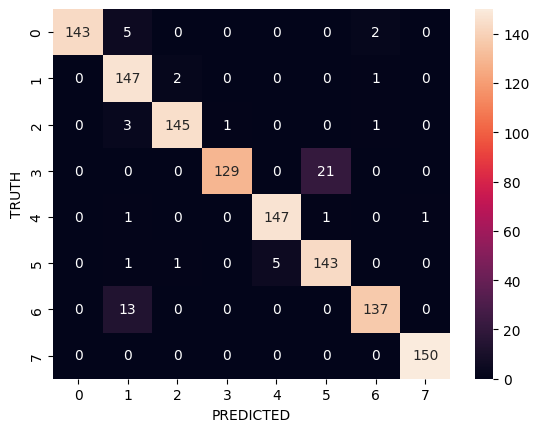

In [ ]:
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

In [ ]:
print(classification_report(y_test_classes,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.86      0.98      0.92       150
           2       0.98      0.97      0.97       150
           3       0.99      0.86      0.92       150
           4       0.97      0.98      0.97       150
           5       0.87      0.95      0.91       150
           6       0.97      0.91      0.94       150
           7       0.99      1.00      1.00       150

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [ ]:
import matplotlib.pyplot as plt

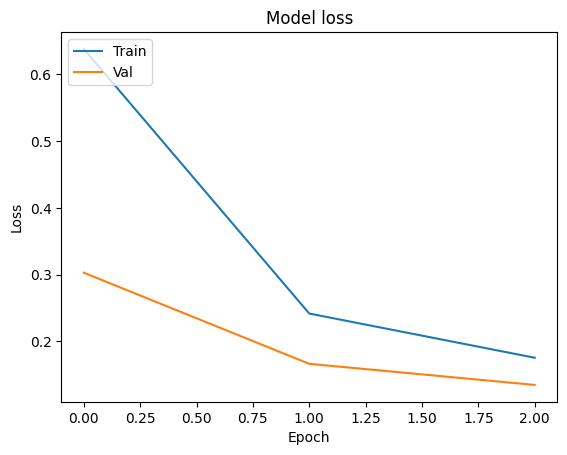

In [ ]:
plt.plot(history_Mod.history['loss'])
plt.plot(history_Mod.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

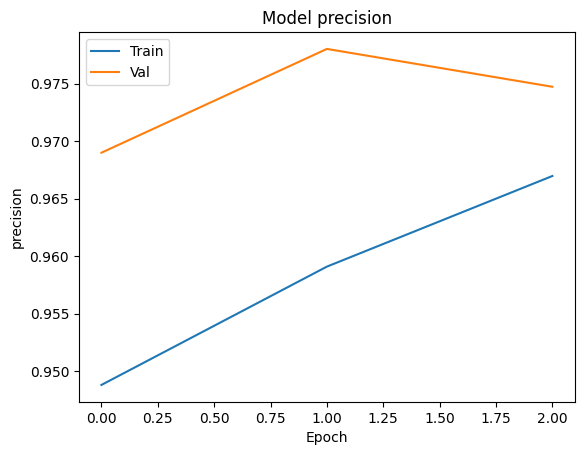

In [ ]:
plt.plot(history_Mod.history['precision'])
plt.plot(history_Mod.history['val_precision'])
plt.title('Model precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

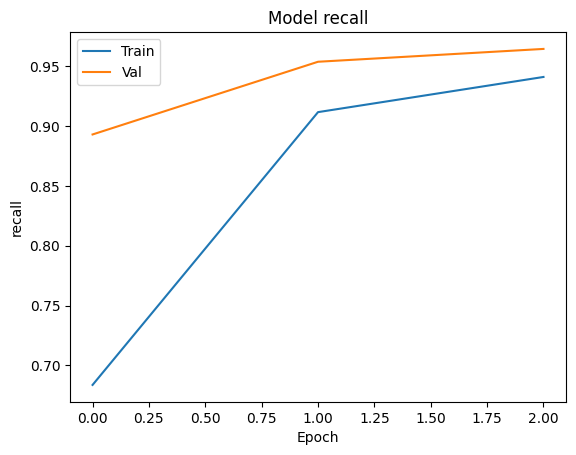

In [ ]:
plt.plot(history_Mod.history['recall'])
plt.plot(history_Mod.history['val_recall'])
plt.title('Model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### EXPERIMENT

In [ ]:
rev=["NO","156","Retail","Christmas","7393173388758","S/15, 3CM, RUSTY/CHAMPAGNE SHINY/ FROSTED/GLIT","1","47.90"]

In [ ]:
y_rev = lmodel.predict(df_Clean.iloc[0].to_numpy(dtype=str))

1/1 [==============================] - 19s 19s/step


In [ ]:
y_rev_arg = np.argmax(y_rev, axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
y_l=le.fit_transform(Transpose_Xy['Y'])

In [ ]:
col = ['Y','ly']

In [ ]:
df_Y = pd.DataFrame(columns=col)

In [ ]:
df_Y['Y'] = Transpose_Xy['Y'].unique()

In [ ]:
df_Y['ly'] = le.fit_transform(df_Y['Y'])

In [ ]:
df_Y

,Y,ly
0,Country,2
1,Shop,5
2,Article Category,0
3,Article text,1
4,UPC or EAN,7
5,Sales units,3
6,Sales value,4
7,TBD,6


In [ ]:
df_Clean.iloc[0]

Country                                                            SE
Channel                                                        Retail
Shop                                                              071
Location                             Örnsköldsvik, Galleria Magasinet
Article Category                                          Spare parts
Sub category                                            Spare parts 2
Product group                                  Multimedia spare parts
Product Group ID                                            511554000
UPC or EAN                                              0017229130364
Brand                                                     Plantronics
Article text        PLANTRONICS ÖRONPLUGG KIT MEDIUM VOYAGER LEGEN...
Item/Model ID                                      120215 (203710-02)
Feature text                                   EARGELS SIZE:M (3 PCS)
Item description                       GUMMISKYDD/EARGELS MEDIUM(3-P)
Sales units         

In [ ]:
y_rev_arg

array([2, 6, 5, 6, 0, 1, 0, 7, 7, 1, 1, 7, 1, 1, 3, 4])

## LOAD WITH WEIGHT

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

In [ ]:
with custom_object_scope({'KerasLayer': hub.KerasLayer}):
    lmodel = load_model('/content/drive/MyDrive/HACKFEST COLAB DATA/bert.h5')

In [ ]:
checkpoint_dir = '/content/drive/MyDrive/HACKFEST COLAB DATA'

In [ ]:
checkpoint = tf.train.Checkpoint(model=lmodel)

In [ ]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    status = checkpoint.restore(latest_checkpoint)
    # status.assert_consumed()  # Optional: This line helps verify that all variables/weights were successfully restored.
    print(f"Restored model weights from checkpoint: {latest_checkpoint}")
else:
    print("No checkpoint found.")

Restored model weights from checkpoint: /content/drive/MyDrive/HACKFEST COLAB DATA/ckpt_5


In [ ]:
lmodel.save('/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### EVALUATION METRICS

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
lmodel.evaluate(X_test,y_test)

37/37 [==============================] - 684s 18s/step - loss: 0.2577 - accuracy: 0.0000e+00 - precision: 0.9297 - recall: 0.8936


[0.2577456533908844, 0.0, 0.9297012090682983, 0.8935810923576355]

In [ ]:
lyhat_probs = lmodel.predict(X_test, verbose=1)

37/37 [==============================] - 631s 17s/step


In [ ]:
lyhat_probs

array([[2.7101519e-02, 4.3685088e-01, 1.5291535e-02, ..., 9.9856211e-03,
        4.2430750e-01, 8.3773062e-03],
       [1.0360020e-03, 2.0190874e-02, 2.2855624e-04, ..., 2.3980637e-03,
        2.8125730e-03, 9.6781886e-01],
       [1.1246549e-03, 4.0336443e-05, 9.9313182e-01, ..., 2.0362977e-04,
        5.0708826e-04, 2.3062305e-06],
       ...,
       [3.8918044e-02, 9.4746524e-01, 2.0688060e-03, ..., 1.1194717e-03,
        5.0926316e-03, 3.6835407e-03],
       [7.4112704e-03, 9.8872417e-01, 1.1656190e-03, ..., 3.3793101e-04,
        1.7532032e-03, 5.0637445e-05],
       [9.7825307e-01, 9.4710784e-03, 9.8935692e-03, ..., 1.1680046e-05,
        1.3641338e-03, 1.5033389e-05]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(lyhat_probs, axis=1)

In [ ]:
y_pred_classes

array([1, 7, 2, ..., 1, 1, 0])

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
y_test_classes

array([6, 7, 2, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)

In [ ]:
accuracy

0.9121621621621622

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test_classes,y_pred_classes)

In [ ]:
cm

array([[138,   7,   0,   0,   0,   0,   3,   0],
       [  1, 146,   0,   0,   0,   0,   0,   1],
       [  2,   5, 139,   1,   0,   0,   1,   0],
       [  0,   0,   0, 111,   0,  37,   0,   0],
       [  0,   0,   0,   0, 145,   1,   0,   2],
       [  0,   3,   1,   1,   5, 138,   0,   0],
       [  0,  33,   0,   0,   0,   0, 115,   0],
       [  0,   0,   0,   0,   0,   0,   0, 148]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(50.722222222222214, 0.5, 'TRUTH')

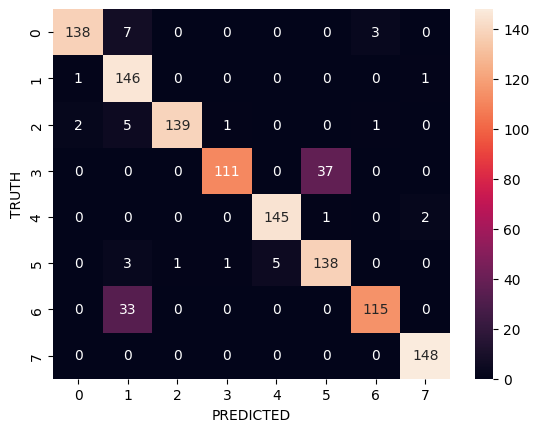

In [ ]:
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

In [ ]:
print(classification_report(y_test_classes,y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       148
           1       0.75      0.99      0.85       148
           2       0.99      0.94      0.97       148
           3       0.98      0.75      0.85       148
           4       0.97      0.98      0.97       148
           5       0.78      0.93      0.85       148
           6       0.97      0.78      0.86       148
           7       0.98      1.00      0.99       148

    accuracy                           0.91      1184
   macro avg       0.93      0.91      0.91      1184
weighted avg       0.93      0.91      0.91      1184



# OUTPUT

## FILE LOAD

In [ ]:
#split the list and stroe it in a dataframe
df_OP = pd.DataFrame([x.split('|')[:] for x in listOfData])

NameError: name 'listOfData' is not defined

In [ ]:
df_OP[15] = df_OP[15].str.replace('\n', '')

In [ ]:
df_OP_1 = pd.read_csv('/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',header=None)

## PREPROCESS

In [ ]:
def toSTR(df):
  return df.astype(str)

In [ ]:
df_OP = toSTR(df_OP_1)

## FIND HEADERS

In [ ]:
Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}

In [ ]:
df_OP_SAM = df_OP_1.sample(10)

In [ ]:
df_OP_SAM_2D = df_OP_SAM.values.tolist()

In [ ]:
def predict_cols(row_each):
  y_rev = lmodel.predict(row_each)
  return np.argmax(y_rev, axis=1)

In [ ]:
Op_col = []
for i in df_OP_SAM_2D:
  Op_col.append(predict_cols(i))

1/1 [==============================] - 5s 5s/step


In [ ]:
Op_col

[array([2, 1, 0, 0, 1, 2, 1, 3, 3]),
 array([2, 1, 1, 1, 1, 1, 2, 3, 4]),
 array([2, 1, 1, 1, 1, 1, 2, 3, 4]),
 array([2, 1, 0, 0, 1, 2, 1, 3, 4]),
 array([2, 2, 0, 0, 1, 2, 6, 3, 4]),
 array([2, 4, 0, 0, 1, 2, 2, 3, 4]),
 array([2, 1, 1, 1, 1, 7, 0, 3, 4]),
 array([2, 2, 0, 0, 1, 2, 1, 3, 4]),
 array([2, 4, 1, 1, 1, 7, 2, 3, 4]),
 array([2, 1, 1, 1, 1, 7, 2, 3, 4])]

In [ ]:
from scipy.stats import mode

In [ ]:
modes, counts = mode(Op_col, axis=0)

In [ ]:
modes

array([2, 1, 0, 0, 1, 2, 2, 3, 4])

In [ ]:
counts

array([10,  6,  5,  5, 10,  5,  5, 10,  9])

In [ ]:
column_header = []

In [ ]:
notelist = []

In [ ]:
for j in range(len(counts)):
  if counts[j] > 8:
    sure_hit(j)
  elif counts[j]>5 and counts[j]<9:
    unsure_hit(j)
  else:
    notelist.append(modes[j])
    column_header.append(Col_Map.get(6))

1/1 [==============================] - 5s 5s/step


In [ ]:
def sure_hit(j):
    if modes[j] not in notelist:
      notelist.append(modes[j])
      column_header.append(Col_Map.get(modes[j]))
    elif modes[j] == 6:
      notelist.append(modes[j])
      column_header.append(Col_Map.get(modes[j]))
    else:
      val = alreadyPresCheck(df_OP[j].sample(10).tolist(),df_OP[notelist.index(modes[j])].sample(10).tolist(),j,modes[j])
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(val))

In [ ]:
def unsure_hit(j):
    if modes[j] not in notelist:
      val = interCall(df_OP[j].sample(10).tolist(),j)
      column_header.append(Col_Map.get(val))
    elif modes[j] == 6:
      notelist.append(modes[j])
      column_header.append(Col_Map.get(modes[j]))
    else:
      val = alreadyPresCheck(df_OP[j].sample(10).tolist(),df_OP[notelist.index(modes[j])].sample(10).tolist(),j,modes[j])
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(val))

In [ ]:
def interCall(lis,j):
  lis_col = predict_cols(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    return modes_lis
  elif counts_lis>5 and counts_lis<9:
    val = lastCall(df_OP[j].sample(10).tolist())
    return val
  else:
    return 6

In [ ]:
def lastCall(lis):
  lis_col = predict_cols(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    return modes_lis
  else:
    return 6

In [ ]:
def alreadyPresCheck(curr,previ,j,note_val):
  if note_val == 7:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return -6
    elif previ_val == 13 or previ_val == 8:
      return 6
    else:
      return 6
  curr_col = interCall(curr,j)
  previ_col = interCall(previ,j)
  if curr_col == previ_col:
    return 6
  if curr_col != previ_col:
    if(previ_col == note_val):
      return curr_col
    else:
      return -abs(previ_col)

In [ ]:
column_header

['Country',
 'TBD',
 'TBD',
 'TBD',
 'Article text',
 'TBD',
 'TBD',
 'Sales units',
 'Sales value']

## EVAL HEADERS

In [ ]:
df_ORIG = df_OP_1.copy()
df_OPC = df_OP_1.copy()

In [ ]:
df_ORIG.columns = ['Country', 'Shop', 'Article Category', 'Sub category', 'Article text', 'UPC or EAN', 'Distributor', 'Sales units', 'Sales value']

In [ ]:
df_OPC.columns = column_header

In [ ]:
df_OPC

,Country,TBD,TBD,TBD,Article text,TBD,TBD,Sales units,Sales value
0,SE,1.0,Keyboard & Mice,Mice - Ergonomic,Contour RollerMouse Red - rullmus - USB,7.438700e+11,Despec,1,2717.7300
1,DK,11.0,Multimedia & Audio,Headsets,EPOS I SENNHEISER ADAPT 461T - Hörlurar med mi...,5.714710e+12,Triada,1,1446.4800
2,NO,233.0,Power-adaptors & UPS,Power Adapters,HP Smart AC Adapter - strömadapter - 65 Watt,5.712510e+12,ALSO,1,250.7600
3,SE,44.0,Keyboard & Mice,Mice - Ergonomic,Contour RollerMouse Red Plus - rullmus - USB,7.438700e+11,ALSO,1,2634.1900
4,DK,1.0,Power-adaptors & UPS,Power Adapters,HP Smart AC Adapter - strömadapter - 65 Watt,5.712510e+12,ALSO,1,250.7600
...,...,...,...,...,...,...,...,...,...
982,DK,56.0,Keyboard & Mice,Desktop Sets,HP 225 - sats med tangentbord och mus - hela n...,NaN,Ingram,1,171.4300
983,NO,3.0,Storage,External Drives,Hitachi-LG Data Storage GP60NB60 - DVD-skrivar...,4.057190e+12,Ingram,1,468.5000
984,SE,56.0,Mobiles & GPS,Mobiles - Cases & Holsters,Tolerate - Vikbart fodral för mobiltelefon - f...,7.350060e+12,Ingram,1,171.4650
985,DK,3.0,Cables,Adapters,Apple MagSafe to MagSafe 2 Converter - Adapter...,8.859100e+11,TD SYNNEX,2,215.9394


# Full Functional flow to PREDICT

This script automates column categorization and labeling in txt, csv, xlsx files using the model we created. It predicts column labels, resolves ambiguities, and offers user interaction for confirmation. Results are saved to a specified path.

In [ ]:
from scipy.stats import mode
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tabulate import tabulate
import tensorflow_hub as hub
import tensorflow_text as text
import os
import shutil

with custom_object_scope({'KerasLayer': hub.KerasLayer}):
    lmodel = load_model('/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5')
Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
mapping = {
    4: "Country", 3: "Channel", 23: "Shop", 13: "Location",
    0: "Article Category", 24: "Sub category", 17: "Product group",
    16: "Product Group ID", 26: "UPC or EAN", 2: "Brand",
    1: "Article text", 12: "Item/Model ID", 10: "Feature text",
    11: "Item description", 21: "Sales units", 22: "Sales value",
    9: "Distributor", 8: "Discount (%)", 14: "Model",
    18: "Product name", 6: "Date", 15: "Particulars",
    20: "Sales unit", 19: "Rate", 28: "VCH_RATE",
    27: "VCH No", 7: "Debit Amount", 5: "Credit Amount",
    25: "TBD"
}
notelist = []
column_header = []



def load_Data(filepath):
  _, file_extension = os.path.splitext(filepath)
  if file_extension == '.txt':
    with open(filepath, 'r') as file:
      listOfData = file.readlines()
    df = pd.DataFrame([x.split('|')[:] for x in listOfData])
    shape = df.shape[1]-1
    df[shape] = df[shape].str.replace('\n', '')
  elif file_extension == '.csv':
        df = pd.read_csv(filepath,header=None)
  elif file_extension == '.xlsx':
        df = pd.read_excel(filepath,header=None)
  else:
        raise ValueError(f"Unsupported file type: {file_extension}")

  return df

def toSTR(df):
  return df.astype(str)

def predict_cols_here(row_each_val):
  # print("TO predict : ", row_each_val )
  y_rev = lmodel.predict(row_each_val)
  # print("pred init : ",np.argmax(y_rev, axis=1))
  return np.argmax(y_rev, axis=1)

def sure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      column_header.append(Col_Map.get(modes[j]))
    elif modes[j] == 6:
      notelist.append(modes[j])
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(val))
  else:
    column_header.append(Col_Map.get(modes[j]))

def unsure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
      column_header.append(Col_Map.get(val))
    elif modes[j] == 6:
      notelist.append(modes[j])
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(val))
  else:
    val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
    column_header.append(Col_Map.get(val))

def interCall(lis,j,df_WORK):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    return modes_lis
  elif counts_lis>5 and counts_lis<9:
    val = lastCall(df_WORK[j].sample(10).tolist())
    return val
  else:
    return 6

def lastCall(lis):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    return modes_lis
  else:
    return 6

def alreadyPresCheck(curr,previ,j,note_val,df_WORK):
  if note_val == 7:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return -6
    elif previ_val == 13 or previ_val == 8:
      return 6
    else:
      return 6
  curr_col = interCall(curr,j,df_WORK)
  previ_col = interCall(previ,j,df_WORK)
  if curr_col == previ_col:
    return 6
  if curr_col != previ_col:
    if(previ_col == note_val):
      return curr_col
    else:
      return -abs(previ_col)

def checking(df_ORIG_,df_OPC_):
  print('COLUMN HEADERS : ',column_header)
  columns_list = []
  user_input = input("Enter Y for ASSIGNING Column name and N for not Assigning: ")
  if user_input == 'N':
    pass
  else:
    df_OPC_.columns = column_header
  print("DF with PREDICTED COLUMN: ")
  print(df_OPC_.head(5))
  return df_OPC_


def main():
  loopd = 1
  while(loopd == 1):
    df_WORK = pd.DataFrame()
    df_ORIG_ = pd.DataFrame()
    df_OPC_ = pd.DataFrame()
    column_header.clear()
    notelist.clear()
    filepath = ['/content/drive/MyDrive/HACKFEST COLAB DATA/Case4_delivered.txt',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v2.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v3.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (2).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (3).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (4).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (1).csv'
                  ]
    file_input = int(input("Enter a number from 0 to 12 to select a file : "))
    df_WORK = load_Data(filepath[file_input])
    df_WORK = toSTR(df_WORK)
    df_WORK_SAM = df_WORK.sample(10)
    df_WORK_SAM_2D = df_WORK_SAM.values.tolist()
    print("List we pass for predicting : ",df_WORK_SAM_2D)
    Op_col = []
    for i in df_WORK_SAM_2D:
      Op_col.append(predict_cols_here(i))
    modes, counts = mode(Op_col, axis=0)
    # print("Initial Predicted Columns in number format : ", Op_col)
    # print("MODE : ", modes)
    # print("COUNT : ", counts)
    # print(df_WORK)
    j = 0
    pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
    for j in range(len(counts)):
      if counts[j] > 8:
        sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
      elif counts[j]>5 and counts[j]<9:
        unsure_hit(j,modes,counts,df_WORK,pressCheckSkip)
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(6))

    df_ORIG_ = df_WORK.copy()
    df_OPC_ = df_WORK.copy()

    df_Save = checking(df_ORIG_,df_OPC_)
    savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/opfile'+str(file_input)+'.csv'
    if(int(input("Press 8 to save : ")) == 8):
      df_Save.to_csv(savePath, index=False, sep='\t', encoding='utf-8')
    loopd = int(input("Press 1 to continue : "))

if __name__ == "__main__":
    main()


Enter a number from 0 to 12 to select a file : 0
List we pass for predicting :  [['SE', 'Retail', '028', 'Stockholm, Kista Galleria', 'Hardware', 'Screws & Nails', 'Wood screws', '111413005', '7393173096301', 'Clas Ohlson', 'KRYSSPÅRSKRUV 10-PACK', 'DIN 7981 4,8X13', 'POSIDRIV SCREW 4.8X13 S/S 10-P', 'KRYSSPÅRSKRUV 4,8X13 RF. 10-PA', '1', '29.9000'], ['FI', 'Retail', '173', 'Vantaa, Myyrmanni', 'Hardware', 'Screws & Nails', 'Hex screws & bolts', '111133640', '7393173096035', 'Clas Ohlson', 'SKRUV MED CYLINDRISKT HUVUD', 'DIN 912 M6X40', 'SOCKET SCREW M6X40 S/S,10-PACK', 'KUUSIOKOLORUUVI M6X40 RST/HAP.', '1', '5.9900'], ['SE', 'Retail', '020', 'Stockholm, Täby Centrum', 'Home', 'Office', 'Pens', '443468000', '3131910217329', 'Pilot', 'Frixion Clicker 4p', '217329', 'FRIXION CLICKER PENS 4P', 'FRIXION CLICKER 4P', '4', '519.6000'], ['SE', 'Retail', '014', 'Umeå, MVG Gallerian', 'Hardware', 'Plumbing', 'Shower heads & Shower sets', '407358000', '7393173160279', 'Noname Internal', 'RE-INFO

In [ ]:
from scipy.stats import mode
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tabulate import tabulate
import tensorflow_hub as hub
import tensorflow_text as text
import os
import shutil

notelist = []
column_header = []
lmodel = None
Col_Map = None
TBD_VAL = None
EAN_VAL = None



def load_Data(filepath):
  _, file_extension = os.path.splitext(filepath)
  if file_extension == '.txt':
    with open(filepath, 'r') as file:
      listOfData = file.readlines()
    df = pd.DataFrame([x.split('|')[:] for x in listOfData])
    shape = df.shape[1]-1
    df[shape] = df[shape].str.replace('\n', '')
  elif file_extension == '.csv':
        df = pd.read_csv(filepath,header=None)
  elif file_extension == '.xlsx':
        df = pd.read_excel(filepath,header=None)
  else:
        raise ValueError(f"Unsupported file type: {file_extension}")

  return df

def toSTR(df):
  return df.astype(str)

def predict_cols_here(row_each_val):
  # print("TO predict : ", row_each_val )
  y_rev = lmodel.predict(row_each_val)
  # print("pred init : ",np.argmax(y_rev, axis=1))
  return np.argmax(y_rev, axis=1)

def sure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    # print(j,"-----------------------",Col_Map.get(modes[j]))
    column_header.append(Col_Map.get(modes[j]))

def unsure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
      # print(j,"-----------------------",Col_Map.get(val))
      column_header.append(Col_Map.get(val))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
    # print(j,"-----------------------",Col_Map.get(val))
    column_header.append(Col_Map.get(val))

def interCall(lis,j,df_WORK):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  elif counts_lis>5 and counts_lis<9:
    # print(" counts_lis   >5: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    val = lastCall(df_WORK[j].sample(10).tolist())
    # print(" val : ",val)
    return val
  else:
    # print("INTER CALL TBD : ",TBD_VAL)
    return TBD_VAL

def lastCall(lis):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  else:
    # print("LAST CALL TBD : ",TBD_VAL)
    return TBD_VAL

def alreadyPresCheck(curr,previ,j,note_val,df_WORK):
  if note_val == EAN_VAL:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return -abs(TBD_VAL)
    elif previ_val == 13 or previ_val == 8:
      return TBD_VAL
    else:
      return TBD_VAL
  curr_col = interCall(curr,j,df_WORK)
  previ_col = interCall(previ,j,df_WORK)
  if curr_col == previ_col:
    # print("curr_col : ", curr_col , " = ", "previ_col : " , previ_col)
    # print("TBD : ",TBD_VAL)
    return TBD_VAL
  if curr_col != previ_col:
    if(previ_col == note_val):
      # print("note_val : ", note_val , " = ", "previ_col : " , previ_col)
      # print("curr_col : ",curr_col)
      return curr_col
    elif(curr_col == note_val):
      # print("note_val : ", note_val , " = ", "curr_col : " , curr_col)
      # print("previ_col : ",-abs(previ_col))
      return -abs(previ_col)
    else:
      # print("ELSE TBD : ",TBD_VAL)
      return TBD_VAL

def checking(df_ORIG_,df_OPC_):
  print('COLUMN HEADERS : ',column_header)
  columns_list = []
  user_input = input("Enter Y for ASSIGNING Column name and N for not Assigning: ")
  if user_input == 'N':
    pass
  else:
    df_OPC_.columns = column_header
  print("DF with PREDICTED COLUMN: ")
  print(df_OPC_.head(5))
  return df_OPC_


def main():
  loopd = 1
  global lmodel
  global Col_Map
  global TBD_VAL
  global EAN_VAL
  model_choice = input("Choose your model (1 for bert_CPR.h5, 2 for bert29.h5): ")
  model_path = ''
  if model_choice == '1':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7
  elif model_choice == '2':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert29.h5'
    Col_Map = {
    4: "Country", 3: "Channel", 23: "Shop", 13: "Location",
    0: "Article Category", 24: "Sub category", 17: "Product group",
    16: "Product Group ID", 26: "UPC or EAN", 2: "Brand",
    1: "Article text", 12: "Item/Model ID", 10: "Feature text",
    11: "Item description", 21: "Sales units", 22: "Sales value",
    9: "Distributor", 8: "Discount (%)", 14: "Model",
    18: "Product name", 6: "Date", 15: "Particulars",
    20: "Sales unit", 19: "Rate", 28: "VCH_RATE",
    27: "VCH No", 7: "Debit Amount", 5: "Credit Amount",
    25: "TBD"
    }
    TBD_VAL = 25
    EAN_VAL = 26
  else:
    print("Invalid choice. Defaulting to bert_CPR.h5")
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7

  with custom_object_scope({'KerasLayer': hub.KerasLayer}):
    lmodel = load_model(model_path)
  while(loopd == 1):
    df_WORK = pd.DataFrame()
    df_ORIG_ = pd.DataFrame()
    df_OPC_ = pd.DataFrame()
    column_header.clear()
    notelist.clear()
    filepath = ['/content/drive/MyDrive/HACKFEST COLAB DATA/Case4_delivered.txt',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v2.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v3.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (2).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (3).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (4).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (1).csv'
                  ]
    file_input = int(input("Enter a number from 0 to 12 to select a file : "))
    df_WORK = load_Data(filepath[file_input])
    df_WORK = toSTR(df_WORK)
    df_WORK_SAM = df_WORK.sample(10)
    df_WORK_SAM_2D = df_WORK_SAM.values.tolist()
    print("List we pass for predicting : ",df_WORK_SAM_2D)
    Op_col = []
    for i in df_WORK_SAM_2D:
      Op_col.append(predict_cols_here(i))
    modes, counts = mode(Op_col, axis=0)
    # print("Initial Predicted Columns in number format : ", Op_col)
    print("MODE : ", modes)
    print("COUNT : ", counts)
    # print(df_WORK)
    j = 0
    pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
    for j in range(len(counts)):
      if counts[j] > 8:
        sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
      elif counts[j]>5 and counts[j]<9:
        unsure_hit(j,modes,counts,df_WORK,pressCheckSkip)
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(TBD_VAL))

    df_ORIG_ = df_WORK.copy()
    df_OPC_ = df_WORK.copy()

    df_Save = checking(df_ORIG_,df_OPC_)
    if(int(input("Press 8 to save : ")) == 8):
      savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/'+input('Enter the File name to save : ')+'.csv'
      df_Save.to_csv(savePath, index=False, sep=',', encoding='utf-8')
    loopd = int(input("Press 1 to continue : "))

if __name__ == "__main__":
    main()

Choose your model (1 for bert_CPR.h5, 2 for bert29.h5): 2
Enter a number from 0 to 12 to select a file : 0
List we pass for predicting :  [['NO', 'Retail', '187', 'Vestby, Storsenter', 'Hardware', 'Hand tools', 'Screwdrivers', '407099000', '3253560654160', 'STANLEY', 'Fatmax Skruvmejselsats', '0-65-416', 'SCREWDRIVER INS. PH 2 X 125 MM', 'SKRUTREKKER STANLEY ISOL. PH2', '1', '119.9000'], ['NO', 'Retail', '209', 'Sandefjord, Hegnasletta', 'Home', 'Food preparation & Storage', 'Bottle & Can openers', '346389000', '4008033495332', 'Noname Internal', 'ZINK ALLOY CORKSCREW W/ CHROME', '49533.CLAS', 'CORKSCREW WINGED, ALUMINIUM', 'KORKETREKKER', '1', '79.9000'], ['SE', 'Retail', '075', 'Stockholm, Sollentuna Centrum', 'Leisure', 'Camping & Outdoors', 'Reflectors', '411339000', '7350068060045', 'Noname External', 'Albedo 100 Reflective Spray', 'AB0001', 'REFLEKTERANDE SPRAY TEXTIL', 'REFLEKTERANDE SPRAY TEXTIL', '2', '199.8000'], ['SE', 'Retail', '020', 'Stockholm, Täby Centrum', 'Electrical'

In [ ]:
from scipy.stats import mode
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tabulate import tabulate
import tensorflow_hub as hub
import tensorflow_text as text
import os
import shutil

notelist = []
column_header = []
lmodel = None
Col_Map = None
TBD_VAL = None
EAN_VAL = None



def load_Data(filepath):
  _, file_extension = os.path.splitext(filepath)
  if file_extension == '.txt':
    with open(filepath, 'r') as file:
      listOfData = file.readlines()
    df = pd.DataFrame([x.split('|')[:] for x in listOfData])
    shape = df.shape[1]-1
    df[shape] = df[shape].str.replace('\n', '')
  elif file_extension == '.csv':
        df = pd.read_csv(filepath,header=None)
  elif file_extension == '.xlsx':
        df = pd.read_excel(filepath,header=None)
  else:
        raise ValueError(f"Unsupported file type: {file_extension}")

  return df

def toSTR(df):
  return df.astype(str)

def predict_cols_here(row_each_val):
  # print("TO predict : ", row_each_val )
  y_rev = lmodel.predict(row_each_val)
  # print("pred init : ",np.argmax(y_rev, axis=1))
  return np.argmax(y_rev, axis=1)

def sure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    # print(j,"-----------------------",Col_Map.get(modes[j]))
    column_header.append(Col_Map.get(modes[j]))

def unsure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
      # print(j,"-----------------------",Col_Map.get(val))
      column_header.append(Col_Map.get(val))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
    # print(j,"-----------------------",Col_Map.get(val))
    column_header.append(Col_Map.get(val))

def interCall(lis,j,df_WORK):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  elif counts_lis>5 and counts_lis<9:
    # print(" counts_lis   >5: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    val = lastCall(df_WORK[j].sample(10).tolist())
    # print(" val : ",val)
    return val
  else:
    # print("INTER CALL TBD : ",TBD_VAL)
    return TBD_VAL

def lastCall(lis):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mode(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  else:
    # print("LAST CALL TBD : ",TBD_VAL)
    return TBD_VAL

def alreadyPresCheck(curr,previ,j,note_val,df_WORK):
  if note_val == EAN_VAL:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return -abs(TBD_VAL)
    elif previ_val == 13 or previ_val == 8:
      return TBD_VAL
    else:
      return TBD_VAL
  curr_col = interCall(curr,j,df_WORK)
  previ_col = interCall(previ,j,df_WORK)
  if curr_col == previ_col:
    # print("curr_col : ", curr_col , " = ", "previ_col : " , previ_col)
    # print("TBD : ",TBD_VAL)
    return TBD_VAL
  if curr_col != previ_col:
    if(previ_col == note_val):
      # print("note_val : ", note_val , " = ", "previ_col : " , previ_col)
      # print("curr_col : ",curr_col)
      return curr_col
    elif(curr_col == note_val):
      # print("note_val : ", note_val , " = ", "curr_col : " , curr_col)
      # print("previ_col : ",-abs(previ_col))
      return -abs(previ_col)
    else:
      # print("ELSE TBD : ",TBD_VAL)
      return TBD_VAL

def checking(df_ORIG_,df_OPC_):
  print('COLUMN HEADERS : ',column_header)
  columns_list = []
  user_input = input("Enter Y for ASSIGNING Column name and N for not Assigning: ")
  if user_input == 'N':
    pass
  else:
    df_OPC_.columns = column_header
  print("DF with PREDICTED COLUMN: ")
  print(df_OPC_.head(5))
  return df_OPC_


def main():
  loopd = 1
  global lmodel
  global Col_Map
  global TBD_VAL
  global EAN_VAL
  model_choice = input("Choose your model (1 for bert_CPR.h5, 2 for bert29.h5): ")
  model_path = ''
  if model_choice == '1':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7
  elif model_choice == '2':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert29.h5'
    Col_Map = {
    4: "Country", 3: "Channel", 23: "Shop", 13: "Location",
    0: "Article Category", 24: "Sub category", 17: "Product group",
    16: "Product Group ID", 26: "UPC or EAN", 2: "Brand",
    1: "Article text", 12: "Item/Model ID", 10: "Feature text",
    11: "Item description", 21: "Sales units", 22: "Sales value",
    9: "Distributor", 8: "Discount (%)", 14: "Model",
    18: "Product name", 6: "Date", 15: "Particulars",
    20: "Sales unit", 19: "Rate", 28: "VCH_RATE",
    27: "VCH No", 7: "Debit Amount", 5: "Credit Amount",
    25: "TBD"
    }
    TBD_VAL = 25
    EAN_VAL = 26
  else:
    print("Invalid choice. Defaulting to bert_CPR.h5")
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7

  with custom_object_scope({'KerasLayer': hub.KerasLayer}):
    lmodel = load_model(model_path)
  while(loopd == 1):
    df_WORK = pd.DataFrame()
    df_ORIG_ = pd.DataFrame()
    df_OPC_ = pd.DataFrame()
    column_header.clear()
    notelist.clear()
    filepath = ['/content/drive/MyDrive/HACKFEST COLAB DATA/Case4_delivered.txt',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v2.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v3.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (2).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (3).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (4).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (1).csv'
                  ]
    file_input = int(input("Enter a number from 0 to 12 to select a file : "))
    df_WORK = load_Data(filepath[file_input])
    df_WORK = toSTR(df_WORK)
    df_WORK_SAM = df_WORK.sample(10)
    df_WORK_SAM_2D = df_WORK_SAM.values.tolist()
    print("List we pass for predicting : ",df_WORK_SAM_2D)
    Op_col = []
    for i in df_WORK_SAM_2D:
      Op_col.append(predict_cols_here(i))
    modes, counts = mode(Op_col, axis=0)
    # print("Initial Predicted Columns in number format : ", Op_col)
    print("MODE : ", modes)
    print("COUNT : ", counts)
    # print(df_WORK)
    j = 0
    pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
    for j in range(len(counts)):
      if counts[j] > 8:
        sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
      elif counts[j]>5 and counts[j]<9:
        unsure_hit(j,modes,counts,df_WORK,pressCheckSkip)
      else:
        notelist.append(modes[j])
        column_header.append(Col_Map.get(TBD_VAL))

    df_ORIG_ = df_WORK.copy()
    df_OPC_ = df_WORK.copy()

    df_Save = checking(df_ORIG_,df_OPC_)
    if(int(input("Press 8 to save : ")) == 8):
      savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/'+input('Enter the File name to save : ')+'.csv'
      df_Save.to_csv(savePath, index=False, sep=',', encoding='utf-8')
    loopd = int(input("Press 1 to continue : "))

if __name__ == "__main__":
    main()


Choose your model (1 for bert_CPR.h5, 2 for bert29.h5): 2
Enter a number from 0 to 12 to select a file : 12
List we pass for predicting :  [['2023-10-03', 'CP PLUS CAMERA FULL HD2.4 MP CP-URC-DC24PL2-0360', '1.0', '745.76', '745.76', 'SR/23-24/01585', '11340.0', '9610.17'], ['2023-10-02', 'BNC BRASS', '25.0', '11.02', '275.5', 'SR/23-24/01576', '1325.0', '1122.99'], ['2023-10-03', 'BNC BRASS', '10.0', '11.02', '110.2', 'SR/23-24/01586', '18025.0', '15275.48'], ['2023-10-25', 'DELL USB KEYBOARD KB216 BLACK', '1.0', '423.73', '423.73', 'SR/23-24/01808', '500.0', '423.73'], ['2023-10-10', '300 QUANTUM WIFI DONGLE RECEIVER', '1.0', '254.24', '254.24', 'SR/23-24/01689', '300.0', '254.24'], ['2023-10-10', 'DAICHI LRAM 8GB DDR3', '1.0', '847.46', '847.46', 'SR/23-24/01682', '15750.0', '13347.47'], ['2023-10-10', 'ENT MOTHERBOARD FOR COMPUTER E-MBG61', '1.0', '1779.66', '1779.66', 'SR/23-24/01682', '15750.0', '13347.47'], ['2023-10-27', 'IGST', '1.0', '50677.97', '50677.97', 'SR/T/23-24/1525',

# Output with feedback

In [ ]:
from scipy.stats import mode as mods
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tabulate import tabulate
import tensorflow_hub as hub
import tensorflow_text as text
import os
import shutil
from statistics import mode, StatisticsError
import numpy as np

notelist = []
column_header = []
lmodel = None
Col_Map = None
TBD_VAL = None
EAN_VAL = None



def load_Data(filepath):
  _, file_extension = os.path.splitext(filepath)
  if file_extension == '.txt':
    with open(filepath, 'r') as file:
      listOfData = file.readlines()
    df = pd.DataFrame([x.split('|')[:] for x in listOfData])
    shape = df.shape[1]-1
    df[shape] = df[shape].str.replace('\n', '')
  elif file_extension == '.csv':
        df = pd.read_csv(filepath,header=None)
  elif file_extension == '.xlsx':
        df = pd.read_excel(filepath,header=None)
  else:
        raise ValueError(f"Unsupported file type: {file_extension}")

  return df

def toSTR(df):
  return df.astype(str)

def predict_cols_here(row_each_val):
  # print("TO predict : ", row_each_val )
  y_rev = lmodel.predict(row_each_val)
  # print("pred init : ",np.argmax(y_rev, axis=1))
  return np.argmax(y_rev, axis=1)

def sure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    # print(j,"-----------------------",Col_Map.get(modes[j]))
    column_header.append(Col_Map.get(modes[j]))

def unsure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
      # print(j,"-----------------------",Col_Map.get(val))
      column_header.append(Col_Map.get(val))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
    # print(j,"-----------------------",Col_Map.get(val))
    column_header.append(Col_Map.get(val))

def interCall(lis,j,df_WORK):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mods(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  elif counts_lis>5 and counts_lis<9:
    # print(" counts_lis   >5: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    val = lastCall(df_WORK[j].sample(10).tolist())
    # print(" val : ",val)
    return val
  else:
    # print("INTER CALL TBD : ",TBD_VAL)
    return TBD_VAL

def lastCall(lis):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mods(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  else:
    # print("LAST CALL TBD : ",TBD_VAL)
    return TBD_VAL

def alreadyPresCheck(curr,previ,j,note_val,df_WORK):
  if note_val == EAN_VAL:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return -abs(TBD_VAL)
    elif previ_val == 13 or previ_val == 8:
      return TBD_VAL
    else:
      return TBD_VAL
  curr_col = interCall(curr,j,df_WORK)
  previ_col = interCall(previ,j,df_WORK)
  if curr_col == previ_col:
    # print("curr_col : ", curr_col , " = ", "previ_col : " , previ_col)
    # print("TBD : ",TBD_VAL)
    return TBD_VAL
  if curr_col != previ_col:
    if(previ_col == note_val):
      # print("note_val : ", note_val , " = ", "previ_col : " , previ_col)
      # print("curr_col : ",curr_col)
      return curr_col
    elif(curr_col == note_val):
      # print("note_val : ", note_val , " = ", "curr_col : " , curr_col)
      # print("previ_col : ",-abs(previ_col))
      return -abs(previ_col)
    else:
      # print("ELSE TBD : ",TBD_VAL)
      return TBD_VAL

def checking(df_ORIG_,df_OPC_,discrepancy_maps_list,Op_col):
  print('COLUMN HEADERS : ',column_header)
  columns_list = []
  df_OPC_.columns = column_header
  if not discrepancy_maps_list or all(item is None for item in discrepancy_maps_list):
    return df_OPC_
  else :
    feedback = []
    j = 0
    for maps in discrepancy_maps_list:
      fbackStr = ''
      if not maps and ("TBD" not in column_header):
        feedback.append("All are Predicted correct")
      else:
        for i in range(len(column_header)):
          if i in maps:
            col_name = Col_Map.get(maps.get(i))
            strs = "the column number " + str(i+1) + " is predicted as " + col_name
            fbackStr = fbackStr + ',' + strs
        if("TBD" in column_header):
          indices = [index for index, value in enumerate(column_header) if value == "TBD"]
          for l in indices:
            tbdStr = "The TBD is in column " + str(l+1)+ " " + Col_Map.get(Op_col[j][l])
            fbackStr = fbackStr + ',' + tbdStr
        feedback.append(fbackStr)
      j=j+1
    missing_length = len(df_OPC_) - len(feedback)
    feedback.extend([""] * missing_length)
    df_OPC_['Feedback'] = feedback
    print("DF with PREDICTED COLUMN: ")
    print(df_OPC_.head(5))
    return df_OPC_

def find_and_add_discrepancies_mode(matrix):
    # Convert the list of lists (matrix) to a NumPy array for easier column slicing
    matrix = np.array(matrix)
    num_rows, num_cols = matrix.shape

    # Prepare a new column for discrepancies
    discrepancy_column = [{} for _ in range(num_rows)]

    # Loop over each column
    for col in range(num_cols):
        try:
            # Calculate the mode of the current column
            col_mode = mode(matrix[:, col])
        except StatisticsError:
            # If no unique mode, pick the first occurrence or handle it as needed
            col_mode = matrix[0, col]

        # Loop over each row in the current column
        for row in range(num_rows):
            if matrix[row, col] != col_mode:
                # If a discrepancy is found, add the discrepancy to the dictionary in the new column
                discrepancy_column[row][col] = matrix[row, col]

    # Convert the new column of dictionaries into a format suitable for a DataFrame
    discrepancy_column = np.array(discrepancy_column, dtype=object)

    # Concatenate the original matrix with the new column
    extended_matrix = np.column_stack((matrix, discrepancy_column))

    return extended_matrix


def main():
  loopd = 1
  global lmodel
  global Col_Map
  global TBD_VAL
  global EAN_VAL
  discrepancy_maps_list = []
  model_choice = input("Choose your model (1 for bert_CPR.h5, 2 for bert29.h5, 3 for bert16.h5): ")
  model_path = ''
  if model_choice == '1':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7
  elif model_choice == '2':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert29.h5'
    Col_Map = {
    4: "Country", 3: "Channel", 23: "Shop", 13: "Location",
    0: "Article Category", 24: "Sub category", 17: "Product group",
    16: "Product Group ID", 26: "UPC or EAN", 2: "Brand",
    1: "Article text", 12: "Item/Model ID", 10: "Feature text",
    11: "Item description", 21: "Sales units", 22: "Sales value",
    9: "Distributor", 8: "Discount (%)", 14: "Model",
    18: "Product name", 6: "Date", 15: "Particulars",
    20: "Sales unit", 19: "Rate", 28: "VCH_RATE",
    27: "VCH No", 7: "Debit Amount", 5: "Credit Amount",
    25: "TBD"
    }
    TBD_VAL = 25
    EAN_VAL = 26
  elif model_choice == '3':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert16.h5'
    Col_Map = {4: 'Country', 3: 'Channel', 13: 'Shop', 8: 'Location', 0: 'Article Category', 14: 'Sub category', 10: 'Product group', 9: 'Product Group ID', 15: 'UPC or EAN', 2: 'Brand', 1: 'Article text', 7: 'Item/Model ID', 5: 'Feature text', 6: 'Item description', 11: 'Sales units', 12: 'Sales value', 16: 'TBD'}
    TBD_VAL = 16
    EAN_VAL = 15
  else:
    print("Invalid choice. Defaulting to bert_CPR.h5")
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7

  with custom_object_scope({'KerasLayer': hub.KerasLayer}):
    lmodel = load_model(model_path)
  while(loopd == 1):
    df_WORK = pd.DataFrame()
    df_ORIG_ = pd.DataFrame()
    df_OPC_ = pd.DataFrame()

    column_header.clear()
    notelist.clear()
    filepath = ['/content/drive/MyDrive/HACKFEST COLAB DATA/Case4_delivered.txt',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v2.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v3.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (2).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (3).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (4).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (1).csv'
                  ]
    file_input = int(input("Enter a number from 0 to 12 to select a file : "))
    df_WORK = load_Data(filepath[file_input])
    df_WORK = toSTR(df_WORK)
    custom_predict = int(input("Press 1 for sample based prediction / Press 0 for head based prediction : "))
    if custom_predict == 1:
      if(model_choice == 1):
        ThreshHold_Sure = 8
        ThreshHold_UnSure_Min = 5
        ThreshHold_UnSure_Max = 9
      elif(model_choice == 2):
        ThreshHold_Sure = 7
        ThreshHold_UnSure_Min = 8
        ThreshHold_UnSure_Max = 3
      elif(model_choice == 3):
        ThreshHold_Sure = 7
        ThreshHold_UnSure_Min = 8
        ThreshHold_UnSure_Max = 3
      else:
        ThreshHold_Sure = 8
        ThreshHold_UnSure_Min = 5
        ThreshHold_UnSure_Max = 9
      df_WORK_SAM = df_WORK.sample(10)
      df_WORK_SAM_2D = df_WORK_SAM.values.tolist()
      print("List we pass for predicting : ",df_WORK_SAM_2D)
      Op_col = []
      for i in df_WORK_SAM_2D:
        Op_col.append(predict_cols_here(i))
      modes, counts = mods(Op_col, axis=0)
      # print("Initial Predicted Columns in number format : ", Op_col)
      print("MODE : ", modes)
      print("COUNT : ", counts)
      # print(df_WORK)
      j = 0
      pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
      for j in range(len(counts)):
        if counts[j] > ThreshHold_Sure:
          sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
        elif counts[j]>ThreshHold_UnSure_Min and counts[j]<ThreshHold_UnSure_Max:
          unsure_hit(j,modes,counts,df_WORK,pressCheckSkip)
        else:
          notelist.append(modes[j])
          column_header.append(Col_Map.get(TBD_VAL))

      df_ORIG_ = df_WORK.copy()
      df_OPC_ = df_WORK.copy()

      df_Save = checking(df_ORIG_,df_OPC_,discrepancy_maps_list,Op_col)
      if(int(input("Press 8 to save : ")) == 8):
        savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/'+input('Enter the File name to save : ')+'.csv'
        df_Save.to_csv(savePath, index=False, sep=',', encoding='utf-8')
    else :
      lengthOfRows = int(input("Enter the number of rows you need to predict / or press 0 for prediction full document : "))
      if lengthOfRows > 0:
        df_WORK_HEAD = df_WORK.head(lengthOfRows)
        df_WORK_HEAD_2D = df_WORK_HEAD.values.tolist()
      else:
        df_WORK_HEAD_2D = df_WORK.values.tolist()

      Op_col = []
      for i in df_WORK_HEAD_2D:
        Op_col.append(predict_cols_here(i))
      for op in Op_col:
        print(op)
      print(Op_col)
      modes, counts = mods(Op_col, axis=0)
      total_cols = len(counts)
      pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
      for j in range(len(counts)):
        if counts[j] > 1:
          sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
        else:
          notelist.append(modes[j])
          column_header.append(Col_Map.get(TBD_VAL))
      df_ORIG_ = df_WORK.copy()
      df_OPC_ = df_WORK.copy()
      extended_matrix = find_and_add_discrepancies_mode(Op_col)
      discrepancy_maps_list = [row[-1] for row in extended_matrix]
      df_Save = checking(df_ORIG_,df_OPC_,discrepancy_maps_list,Op_col)
      if(int(input("Press 8 to save : ")) == 8):
        savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/'+input('Enter the File name to save : ')+'.csv'
        df_Save.to_csv(savePath, index=False, sep=',', encoding='utf-8')
    loopd = int(input("Press 1 to continue : "))

if __name__ == "__main__":
    main()


Choose your model (1 for bert_CPR.h5, 2 for bert29.h5, 3 for bert16.h5): 2
Enter a number from 0 to 12 to select a file : 12
Press 1 for sample based prediction / Press 0 for head based prediction : 1
List we pass for predicting :  [['2023-10-25', 'GT2 CYAN M0H54AA', '1.0', '982.14', '982.14', 'SR/23-24/01802', '1100.0', '982.14'], ['2023-10-12', 'ASUS LAPTOP : E1404FA-NK321WS', '1.0', '29067.8', '29067.8', 'SR/23-24/01732', '34300.0', '29067.8'], ['2023-10-22', 'HP PRO 100MFP M126A', '1.0', '14406.78', '14406.78', 'SR/23-24/01801', '17000.0', '14406.78'], ['2023-10-12', '7424/INS7420 / Ci5/-1235/8/512/W11', '1.0', '67796.61', '67796.61', 'SR/23-24/01723', '80000.0', '67796.61'], ['2023-10-11', '7403 QUANTUM KEYBOARD USB', '1.0', '211.86', '211.86', 'SR/23-24/01707', '250.0', '211.86'], ['2023-10-10', 'CP PLUS CAMERA FULL HD2.4 MP CP-URC-DC24PL2-0360', '1.0', '737.29', '737.29', 'SR/23-24/01674', '870.0', '737.29'], ['2023-10-27', 'JUNCTION BOX SECURENET 4X4', '20.0', '22.88', '457.6',

In [ ]:
from statistics import mode, StatisticsError
import numpy as np

def find_and_add_discrepancies_mode(matrix):
    # Convert the list of lists (matrix) to a NumPy array for easier column slicing
    matrix = np.array(matrix)
    num_rows, num_cols = matrix.shape

    # Prepare a new column for discrepancies
    discrepancy_column = [{} for _ in range(num_rows)]

    # Loop over each column
    for col in range(num_cols):
        try:
            # Calculate the mode of the current column
            col_mode = mode(matrix[:, col])
        except StatisticsError:
            # If no unique mode, pick the first occurrence or handle it as needed
            col_mode = matrix[0, col]

        # Loop over each row in the current column
        for row in range(num_rows):
            if matrix[row, col] != col_mode:
                # If a discrepancy is found, add the discrepancy to the dictionary in the new column
                discrepancy_column[row][col] = matrix[row, col]

    # Convert the new column of dictionaries into a format suitable for a DataFrame
    discrepancy_column = np.array(discrepancy_column, dtype=object)

    # Concatenate the original matrix with the new column
    extended_matrix = np.column_stack((matrix, discrepancy_column))

    return extended_matrix

# Example matrix
matrix = [
    [1, 2, 3],
    [1, 2, 3],
    [2, 2, 4],
    [3,1,5]
]

# Find discrepancies and add them as a new column
extended_matrix = find_and_add_discrepancies_mode(matrix)

# Print the modified matrix with discrepancies column
print("Extended Matrix with Discrepancies:")
for row in extended_matrix:
    print(row)


Extended Matrix with Discrepancies:
[1 2 3 {}]
[1 2 3 {}]
[2 2 4 {0: 2, 2: 4}]
[3 1 5 {0: 3, 1: 1, 2: 5}]


In [ ]:
discrepancy_maps_list = [row[-1] for row in extended_matrix]


In [ ]:
discrepancy_maps_list

[{}, {}, {0: 2, 2: 4}, {0: 3, 1: 1, 2: 5}]

In [ ]:
maps

{0: 2, 2: 4}

# Quick run

In [ ]:
from scipy.stats import mode as mods
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tabulate import tabulate
import tensorflow_hub as hub
import tensorflow_text as text
import os
import shutil
from statistics import mode, StatisticsError
import numpy as np

notelist = []
column_header = []
lmodel = None
Col_Map = None
TBD_VAL = None
EAN_VAL = None
PID_VAL = None



def load_Data(filepath):
  _, file_extension = os.path.splitext(filepath)
  if file_extension == '.txt':
    with open(filepath, 'r') as file:
      listOfData = file.readlines()
    df = pd.DataFrame([x.split('|')[:] for x in listOfData])
    shape = df.shape[1]-1
    df[shape] = df[shape].str.replace('\n', '')
  elif file_extension == '.csv':
        df = pd.read_csv(filepath,header=None)
  elif file_extension == '.xlsx':
        df = pd.read_excel(filepath,header=None)
  else:
        raise ValueError(f"Unsupported file type: {file_extension}")

  return df

def toSTR(df):
  return df.astype(str)

def predict_cols_here(row_each_val):
  # print("TO predict : ", row_each_val )
  y_rev = lmodel.predict(row_each_val)
  # print("pred init : ",np.argmax(y_rev, axis=1))
  return np.argmax(y_rev, axis=1)

def sure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    # print(j,"-----------------------",Col_Map.get(modes[j]))
    column_header.append(Col_Map.get(modes[j]))

def unsure_hit(j,modes,counts,df_WORK,pressCheckSkip):
  if pressCheckSkip == 1:
    if modes[j] not in notelist:
      # print("notelist",notelist)
      notelist.append(modes[j])
      val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
      # print(j,"-----------------------",Col_Map.get(val))
      column_header.append(Col_Map.get(val))
    elif modes[j] == TBD_VAL:
      notelist.append(modes[j])
      # print(j,"-----------------------",Col_Map.get(modes[j]))
      column_header.append(Col_Map.get(modes[j]))
    else:
      # print("notelist",notelist)
      val = alreadyPresCheck(df_WORK[j].sample(10).tolist(),df_WORK[notelist.index(modes[j])].sample(10).tolist(),j,modes[j],df_WORK)
      if val < 0:
        indexVal = notelist.index(modes[j])
        notelist[indexVal] = abs(val)
        column_header[indexVal] = Col_Map.get(abs(val))
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(modes[j]))
        column_header.append(Col_Map.get(modes[j]))
      else:
        notelist.append(modes[j])
        # print(j,"-----------------------",Col_Map.get(val))
        column_header.append(Col_Map.get(val))
  else:
    val = interCall(df_WORK[j].sample(10).tolist(),j,df_WORK)
    # print(j,"-----------------------",Col_Map.get(val))
    column_header.append(Col_Map.get(val))

def interCall(lis,j,df_WORK):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mods(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  elif counts_lis>5 and counts_lis<9:
    # print(" counts_lis   >5: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    val = lastCall(df_WORK[j].sample(10).tolist())
    # print(" val : ",val)
    return val
  else:
    # print("INTER CALL TBD : ",TBD_VAL)
    return TBD_VAL

def lastCall(lis):
  lis_col = predict_cols_here(lis)
  modes_lis, counts_lis = mods(lis_col)
  if counts_lis > 8:
    # print(" counts_lis  8 <: ",counts_lis)
    # print(" modes_lis : ",modes_lis)
    return modes_lis
  else:
    # print("LAST CALL TBD : ",TBD_VAL)
    return TBD_VAL

def alreadyPresCheck(curr,previ,j,note_val,df_WORK):
  if note_val == EAN_VAL:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return -abs(TBD_VAL)
    elif previ_val == 13 or previ_val == 8:
      return TBD_VAL
    else:
      return TBD_VAL
  if note_val == PID_VAL:
    curr_val = len(curr[1])
    previ_val = len(previ[1])
    if curr_val == 13 or curr_val == 8:
      return EAN_VAL
    else:
      return TBD_VAL
  curr_col = interCall(curr,j,df_WORK)
  previ_col = interCall(previ,j,df_WORK)
  if curr_col == previ_col:
    # print("curr_col : ", curr_col , " = ", "previ_col : " , previ_col)
    # print("TBD : ",TBD_VAL)
    return TBD_VAL
  if curr_col != previ_col:
    if(previ_col == note_val):
      # print("note_val : ", note_val , " = ", "previ_col : " , previ_col)
      # print("curr_col : ",curr_col)
      return curr_col
    elif(curr_col == note_val):
      # print("note_val : ", note_val , " = ", "curr_col : " , curr_col)
      # print("previ_col : ",-abs(previ_col))
      return -abs(previ_col)
    else:
      # print("ELSE TBD : ",TBD_VAL)
      return TBD_VAL

def checking(df_ORIG_,df_OPC_,discrepancy_maps_list,Op_col):
  print('COLUMN HEADERS : ',column_header)
  columns_list = []
  df_OPC_.columns = column_header
  if not discrepancy_maps_list or all(item is None for item in discrepancy_maps_list):
    return df_OPC_
  else :
    feedback = []
    j = 0
    for maps in discrepancy_maps_list:
      fbackStr = ''
      if not maps and ("TBD" not in column_header):
        feedback.append("All are Predicted correct")
      else:
        for i in range(len(column_header)):
          if i in maps:
            col_name = Col_Map.get(maps.get(i))
            strs = "the column number " + str(i+1) + " is predicted as " + col_name
            fbackStr = fbackStr + '|' + strs
        if("TBD" in column_header):
          indices = [index for index, value in enumerate(column_header) if value == "TBD"]
          for l in indices:
            tbdStr = "The TBD is in column " + str(l+1)+ ". It is predicted as " + Col_Map.get(Op_col[j][l])
            fbackStr = fbackStr + '|' + tbdStr
        feedback.append(fbackStr)
      j=j+1
    missing_length = len(df_OPC_) - len(feedback)
    feedback.extend([""] * missing_length)
    df_OPC_['Feedback'] = feedback
    print("DF with PREDICTED COLUMN: ")
    print(df_OPC_.head(5))
    return df_OPC_

def find_and_add_discrepancies_mode(matrix):
    # Convert the list of lists (matrix) to a NumPy array for easier column slicing
    matrix = np.array(matrix)
    num_rows, num_cols = matrix.shape

    # Prepare a new column for discrepancies
    discrepancy_column = [{} for _ in range(num_rows)]

    # Loop over each column
    for col in range(num_cols):
        try:
            # Calculate the mode of the current column
            col_mode = mode(matrix[:, col])
        except StatisticsError:
            # If no unique mode, pick the first occurrence or handle it as needed
            col_mode = matrix[0, col]

        # Loop over each row in the current column
        for row in range(num_rows):
            if matrix[row, col] != col_mode:
                # If a discrepancy is found, add the discrepancy to the dictionary in the new column
                discrepancy_column[row][col] = matrix[row, col]

    # Convert the new column of dictionaries into a format suitable for a DataFrame
    discrepancy_column = np.array(discrepancy_column, dtype=object)

    # Concatenate the original matrix with the new column
    extended_matrix = np.column_stack((matrix, discrepancy_column))

    return extended_matrix


def main():
  loopd = 1
  global lmodel
  global Col_Map
  global TBD_VAL
  global EAN_VAL
  global PID_VAL
  discrepancy_maps_list = []
  # model_choice = input("Choose your model (1 for bert_CPR.h5, 2 for bert29.h5, 3 for bert16.h5): ")
  model_choice = '3'
  model_path = ''
  if model_choice == '1':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7
    PID_VAL = 23
  elif model_choice == '2':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert29.h5'
    Col_Map = {
    4: "Country", 3: "Channel", 23: "Shop", 13: "Location",
    0: "Article Category", 24: "Sub category", 17: "Product group",
    16: "Product Group ID", 26: "UPC or EAN", 2: "Brand",
    1: "Article text", 12: "Item/Model ID", 10: "Feature text",
    11: "Item description", 21: "Sales units", 22: "Sales value",
    9: "Distributor", 8: "Discount (%)", 14: "Model",
    18: "Product name", 6: "Date", 15: "Particulars",
    20: "Sales unit", 19: "Rate", 28: "VCH_RATE",
    27: "VCH No", 7: "Debit Amount", 5: "Credit Amount",
    25: "TBD"
    }
    TBD_VAL = 25
    EAN_VAL = 26
    PID_VAL = 16
  elif model_choice == '3':
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert16.h5'
    Col_Map = {4: 'Country', 3: 'Channel', 13: 'Shop', 8: 'Location', 0: 'Article Category', 14: 'Sub category', 10: 'Product group', 9: 'Product Group ID', 15: 'UPC or EAN', 2: 'Brand', 1: 'Article text', 7: 'Item/Model ID', 5: 'Feature text', 6: 'Item description', 11: 'Sales units', 12: 'Sales value', 16: 'TBD'}
    TBD_VAL = 16
    EAN_VAL = 15
    PID_VAL = 9
  else:
    print("Invalid choice. Defaulting to bert_CPR.h5")
    model_path = '/content/drive/MyDrive/HACKFEST COLAB DATA/bert_CPR.h5'
    Col_Map = {2: 'Country', 5: 'Shop', 0: 'Article Category', 1: 'Article text', 7: 'UPC or EAN', 3: 'Sales units', 4: 'Sales value', 6: 'TBD'}
    TBD_VAL = 6
    EAN_VAL = 7
    PID_VAL = 23
  print('Loading the model')
  with custom_object_scope({'KerasLayer': hub.KerasLayer}):
    lmodel = load_model(model_path)
  while(loopd == 1):
    df_WORK = pd.DataFrame()
    df_ORIG_ = pd.DataFrame()
    df_OPC_ = pd.DataFrame()

    column_header.clear()
    notelist.clear()
    filepath = ['/content/drive/MyDrive/HACKFEST COLAB DATA/Case4_delivered.txt',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v1.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v2.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Decode_use_case_4 - v3.csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_delivered.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case2_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case3_expected.xlsx',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (2).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (3).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (4).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/output (1).csv',
                  '/content/drive/MyDrive/HACKFEST COLAB DATA/Case4TestDoc.txt'
                  ]
    # file_input = int(input("Enter a number from 0 to 12 to select a file : "))
    df_WORK = load_Data(filepath[13])
    df_WORK = toSTR(df_WORK)
    # custom_predict = int(input("Press 1 for sample based prediction / Press 0 for head based prediction : "))
    custom_predict = 0
    if custom_predict == 1:
      if(model_choice == 1):
        ThreshHold_Sure = 8
        ThreshHold_UnSure_Min = 5
        ThreshHold_UnSure_Max = 9
      elif(model_choice == 2):
        ThreshHold_Sure = 7
        ThreshHold_UnSure_Min = 8
        ThreshHold_UnSure_Max = 3
      elif(model_choice == 3):
        ThreshHold_Sure = 7
        ThreshHold_UnSure_Min = 8
        ThreshHold_UnSure_Max = 3
      else:
        ThreshHold_Sure = 8
        ThreshHold_UnSure_Min = 5
        ThreshHold_UnSure_Max = 9
      df_WORK_SAM = df_WORK.sample(10)
      df_WORK_SAM_2D = df_WORK_SAM.values.tolist()
      print("List we pass for predicting : ",df_WORK_SAM_2D)
      Op_col = []
      for i in df_WORK_SAM_2D:
        Op_col.append(predict_cols_here(i))
      modes, counts = mods(Op_col, axis=0)
      # print("Initial Predicted Columns in number format : ", Op_col)
      print("MODE : ", modes)
      print("COUNT : ", counts)
      # print(df_WORK)
      j = 0
      pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
      for j in range(len(counts)):
        if counts[j] > ThreshHold_Sure:
          sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
        elif counts[j]>ThreshHold_UnSure_Min and counts[j]<ThreshHold_UnSure_Max:
          unsure_hit(j,modes,counts,df_WORK,pressCheckSkip)
        else:
          notelist.append(modes[j])
          column_header.append(Col_Map.get(TBD_VAL))

      df_ORIG_ = df_WORK.copy()
      df_OPC_ = df_WORK.copy()

      df_Save = checking(df_ORIG_,df_OPC_,discrepancy_maps_list,Op_col)
      if(int(input("Press 8 to save : ")) == 8):
        savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/'+input('Enter the File name to save : ')+'.csv'
        df_Save.to_csv(savePath, index=False, sep=',', encoding='utf-8')
    else :
      # lengthOfRows = int(input("Enter the number of rows you need to predict / or press 0 for prediction full document : "))
      lengthOfRows = 0
      if lengthOfRows > 0:
        df_WORK_HEAD = df_WORK.head(lengthOfRows)
        df_WORK_HEAD_2D = df_WORK_HEAD.values.tolist()
      else:
        df_WORK_HEAD_2D = df_WORK.values.tolist()

      Op_col = []
      for i in df_WORK_HEAD_2D:
        Op_col.append(predict_cols_here(i))
      for op in Op_col:
        print(op)
      # print(Op_col)
      modes, counts = mods(Op_col, axis=0)
      print("mode : ", modes)
      print("counts : ",counts)
      total_cols = len(counts)
      # pressCheckSkip = int(input("Press 1 to skip multi column with same name else press 0: "))
      pressCheckSkip = 1
      for j in range(len(counts)):
        if counts[j] > 1:
          sure_hit(j,modes,counts,df_WORK,pressCheckSkip)
        else:
          notelist.append(modes[j])
          column_header.append(Col_Map.get(TBD_VAL))
      df_ORIG_ = df_WORK.copy()
      df_OPC_ = df_WORK.copy()
      extended_matrix = find_and_add_discrepancies_mode(Op_col)
      discrepancy_maps_list = [row[-1] for row in extended_matrix]
      df_Save = checking(df_ORIG_,df_OPC_,discrepancy_maps_list,Op_col)
      if(int(input("Press 8 to save : ")) == 8):
        savePath = '/content/drive/MyDrive/HACKFEST COLAB DATA/'+input('Enter the File name to save : ')+'.csv'
        df_Save.to_csv(savePath, index=False, sep=',', encoding='utf-8')
    # loopd = int(input("Press 1 to continue : "))
    loopd = 0

if __name__ == "__main__":
    main()


Loading the model
1/1 [==============================] - 6s 6s/step
[ 4  3  7  0 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 11  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3  7  0 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  7 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
[ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
mode :  [ 4  3 13  8 10  7  0  9  9  2  7  9  5 11 12]
counts :  [15 15 12 12 15 15 15 15 15 15 15 15 15 15 15]
1/1 [==============================] - 5s 5s/step
COLUMN HEADERS :  ['Country', 'Channel', 'Shop', 'Location', 'Pro

# SAVE

In [ ]:
import joblib

In [ ]:
filename = '/content/drive/MyDrive/HACKFEST COLAB DATA/random_forest_model.joblib'
joblib.dump(rf_classifier, filename)

['/content/drive/MyDrive/HACKFEST COLAB DATA/random_forest_model.joblib']

# -----

In [ ]:
X = [str(item) for item in df_shuffled.values.flatten().tolist()]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_vectorized_fit = tfidf_vectorizer.fit(X)

In [ ]:
print("output of X_vectorized_fit details along with token = \n", X_vectorized_fit.vocabulary_)

output of X_vectorized_fit details along with token = 
 {'se': 36550, '095': 1477, 'home': 31609, 'led': 32954, 'night': 34290, 'light': 33048, '230v': 4566, '7393173370487': 22719, '12': 2124, '1499': 2801, '5000': 10820, 'retail': 35988, 'no': 34323, '010': 328, 'hardware': 31403, '10': 1526, 'digital': 29441, 'dual': 29662, 'power': 35310, '7333048058768': 16531, '66': 13648, '6000': 12902, 'distributors': 29508, 'cg': 28668, '265': 5143, 'diy': 29514, 'tools': 38259, 'equipment': 30063, 'key': 32382, 'hook': 31621, 'white': 39293, 'ball': 27736, '5010266288611': 10855, '409': 8989, '4000': 7806, 'wholesale': 39306, '049': 645, 'anslutningskabel': 27417, 'vit': 39018, '10m': 1828, '7332462029934': 16265, '159': 2985, '8000': 25066, '061': 705, 'nordic': 34339, 'puzzle': 35527, 'assortment': 27559, '100': 1527, '150': 2823, '200': 3959, '300': 5751, 've': 38878, '3013643004189': 5814, '463': 9967, '539': 11573, '7000': 14152, 'uz': 38775, '135': 2505, 'multimedia': 34072, 'set': 3663

In [ ]:
vocabulary = X_vectorized_fit.get_feature_names_out()

In [ ]:
X_vectorized = X_vectorized_fit.transform(X)  # Transform raw documents
print("output of vectorizer transform = \n", X_vectorized.toarray())

# Model Training

## Approach 1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 4],
       [0, 0, 0, 0, 0, 0, 0, 5, 6, 7]], dtype=int32)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[ 1.41421356],
       [-0.70710678],
       [-0.70710678]])

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  2.        ,
         1.        ,  0.        ,  0.        ,  1.41421356],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  3.        ,  4.        ,
         0.        ,  1.        ,  0.        , -0.70710678],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  5.        ,  6.        ,  7.        ,
         0.        ,  0.        ,  1.        , -0.70710678]])

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(1, 14)


In [ ]:
# Dummy new data example
new_texts = ["Some new text"]
new_categories = ['New Category']
new_numerical = [[150.0]]

# Preprocess new data here similar to steps above...

# Predict
predictions = model.predict(new_X)


## Approach 2